In [84]:
!pip install optuna

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os 
import optuna
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
plt.rcParams['figure.figsize'] = [10,5]

In [86]:
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Capstone")
df=pd.read_csv("DataSet.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


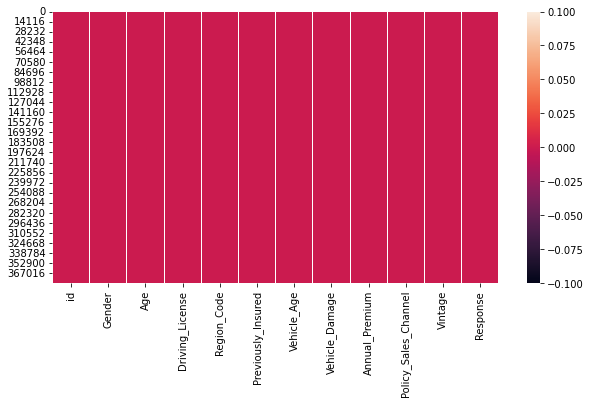

In [87]:
df.shape
#Inference
# It has 381k+ rows and 12 columns.
sns.heatmap(df.isnull())
plt.show()

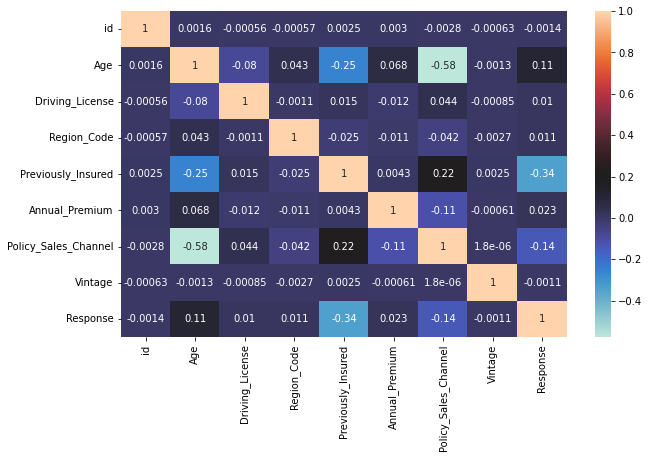

In [88]:
#df.info()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot = True,cmap = "icefire")
plt.show()
# Inference
# From below we can see there are 2 categorical columns and 10 numerical

In [89]:
df.describe()
# Inference:
# Since we dont see any nan in below output ,there are no missing values.
# Age varies between 20 and 85 years with median of 36 years old.
# Annual_Premium has high variation as it mean is 30564 , median is 31669 and max value is 5,40,165  hence we can say there are extreme outliers.
# Policy_Sales_Channel varies from  1 to 163,but according to the problem description this is the code for outreaching to the customer ,hence this is supposed to be categorical.This needs to categorized based on inference from further analysis.
# Vinatage measures the no of days a customer has been associated with the company.
# Response is the target variable which indicates 1 : Customer is interested, 0 : Customer is not interested.

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [90]:
df.describe(include=object)
# Gender has 2 unique values with more male customers.
# Vechile_age has 3 unique values with majority of the vehicle age of 1-2 Year.
# Vehicle_Damage has 2 unique values comprising more of damaged vehicles

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [91]:
df['id'].nunique()
# All records in this column are unique ,hence we can set index as this column

381109

In [92]:
df['Gender'].value_counts(1)*100
# Here gender is not imbalanced i.e Male percentage is 54.07.

Male      54.07613
Female    45.92387
Name: Gender, dtype: float64

In [93]:
df['Age'].nunique()
# We have 66 unique values for age which can also be categorized further for model optimization

66

In [94]:
df['Driving_License'].value_counts(1)*100
# 0 refers to Customer does not have DL
# 1 : Customer already has DL
# here 99.78% of customers have Driving License

1    99.786938
0     0.213062
Name: Driving_License, dtype: float64

In [95]:
df['Region_Code'].nunique()
# Unique code for the region of the customer.Region_code is incorrectly mapped as float but it is supposed to be categorical variable based on description provided.
# Customers are diversed among 53 regions.

53

In [96]:
df['Region_Code'].value_counts(1)*100
# Customers from 28 region code are densely populated.

28.0    27.922458
8.0      8.889058
46.0     5.181982
41.0     4.792067
15.0     3.491914
30.0     3.198822
29.0     2.903369
50.0     2.687683
3.0      2.427390
11.0     2.422404
36.0     2.308264
33.0     2.008349
47.0     1.951148
35.0     1.821526
6.0      1.647823
45.0     1.470708
37.0     1.443419
18.0     1.352107
48.0     1.228258
14.0     1.227470
39.0     1.218549
10.0     1.147703
21.0     1.119365
2.0      1.059539
13.0     1.059015
7.0      0.860384
12.0     0.839130
9.0      0.813678
27.0     0.740733
32.0     0.731287
43.0     0.692453
17.0     0.686680
26.0     0.678808
25.0     0.656767
24.0     0.633677
38.0     0.531606
0.0      0.530294
16.0     0.526621
31.0     0.514289
23.0     0.514289
20.0     0.507729
49.0     0.480702
4.0      0.472568
34.0     0.436620
19.0     0.402772
22.0     0.343471
40.0     0.339798
5.0      0.335600
1.0      0.264491
44.0     0.212013
42.0     0.155074
52.0     0.070059
51.0     0.048018
Name: Region_Code, dtype: float64

In [97]:
df['Previously_Insured'].nunique()
# 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
# This must be categorical column but it is a int data type which needs to be changed 

2

In [98]:
df['Previously_Insured'].value_counts(1)
# Here close to average number of customers do not have vehicle insurance

0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64

In [99]:
df['Vehicle_Age'].nunique()
# 	Vehicle_Age describes the Age of the Vehicle which has  3 categories

3

In [100]:
df['Vehicle_Age'].value_counts(1)*100
# Here 95% of the customers have vehicle age < 2 years 

1-2 Year     52.561341
< 1 Year     43.238549
> 2 Years     4.200111
Name: Vehicle_Age, dtype: float64

In [101]:
df['Vehicle_Damage'].nunique()
# Yes : Customer got his/her vehicle damaged in the past. No : Customer didn't get his/her vehicle damaged in the past.

2

In [102]:
df['Vehicle_Damage'].value_counts(1)*100

Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64

In [103]:
# 50% of the customer vehicles are damaged which can be an important factor for analysis.

In [104]:
df['Policy_Sales_Channel'].nunique()
# Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
# Dtype for this column mentioned is Float but this is a categorical column describing the mode of reaching the customers, this have 155 unique values but needs to categorized based on above description

155

In [105]:
df['Policy_Sales_Channel'].value_counts(1)*100
# Here Need to further analyze the data to categorize it.

152.0    35.366260
26.0     20.912652
124.0    19.415705
160.0     5.714638
156.0     2.797362
122.0     2.605554
157.0     1.753829
154.0     1.572516
151.0     1.019393
163.0     0.759100
13.0      0.489361
25.0      0.484901
7.0       0.419303
8.0       0.397524
30.0      0.369973
55.0      0.331664
155.0     0.323792
11.0      0.315658
1.0       0.281809
52.0      0.276824
125.0     0.269214
15.0      0.233004
29.0      0.221197
12.0      0.205453
120.0     0.201780
24.0      0.196794
31.0      0.165569
14.0      0.163208
153.0     0.159272
61.0      0.151925
3.0       0.137231
16.0      0.137231
60.0      0.135657
4.0       0.133558
158.0     0.129097
23.0      0.110729
22.0      0.087114
150.0     0.081866
10.0      0.069272
19.0      0.058251
136.0     0.048543
147.0     0.048280
109.0     0.045919
145.0     0.045656
9.0       0.044344
18.0      0.043819
91.0      0.041458
116.0     0.040408
37.0      0.039884
21.0      0.038834
139.0     0.037522
128.0     0.035948
42.0      0.

In [106]:
df['Vintage'].nunique()
#Number of Days, Customer has been associated with the company

290

In [107]:
# It has 290 unique values which can also be categorized.

In [108]:
df['Vintage'].value_counts(1)*100

256    0.372072
73     0.369973
282    0.366562
158    0.365775
187    0.365250
31     0.364200
226    0.364200
160    0.364200
245    0.363938
131    0.363938
126    0.363675
232    0.363675
298    0.363151
103    0.362888
191    0.362888
215    0.362626
27     0.362626
24     0.361839
65     0.361839
54     0.361576
130    0.361052
197    0.360789
63     0.360789
37     0.360264
42     0.360002
249    0.359477
74     0.358952
284    0.358690
34     0.358428
117    0.358428
76     0.358165
80     0.357903
228    0.357903
263    0.357903
292    0.357640
110    0.357378
92     0.357378
165    0.357116
248    0.357116
195    0.356853
83     0.356591
77     0.356329
241    0.356329
113    0.356066
250    0.356066
56     0.356066
144    0.355804
219    0.355804
200    0.355541
84     0.355279
102    0.354754
90     0.354754
94     0.354492
222    0.354492
147    0.354229
193    0.353967
257    0.353705
173    0.353705
270    0.353705
194    0.353442
151    0.353180
189    0.353180
288    0

In [109]:
df['Response'].nunique()
# 1 : Customer is interested, 0 : Customer is not interested

2

In [110]:
df['Response'].value_counts(1)*100
# Target variable is imbalanced with 87 % of customers not interested in vehicle insurance

0    87.743664
1    12.256336
Name: Response, dtype: float64

In [111]:
# Univariate Analysis

In [112]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

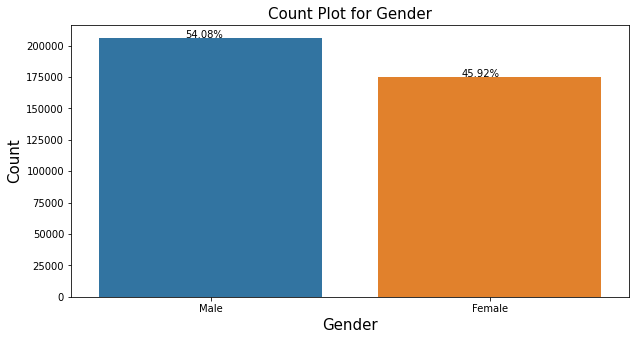

In [113]:
sns.countplot(df['Gender'])
plt.text(x = -0.09, y = df['Gender'].value_counts()[0] , s = str(round((df['Gender'].value_counts()[0])*100/len(df['Gender']),2)) + '%')
plt.text(x = 0.90, y = df['Gender'].value_counts()[1] , s = str(round((df['Gender'].value_counts()[1])*100/len(df['Gender']),2)) + '%')
plt.title('Count Plot for Gender', fontsize = 15)
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()
# Insurance company has more male customers compared to female

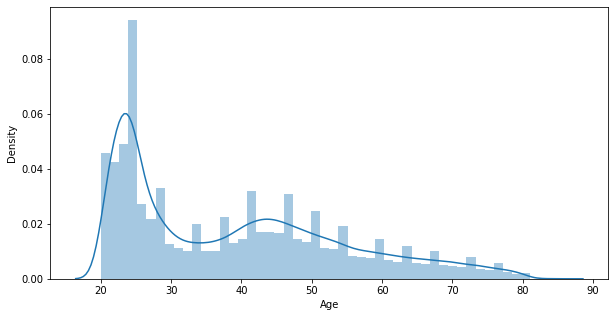

In [114]:
sns.distplot(df['Age'])
plt.show()
 # Customer age varying 20 years to 88 years (Right Skewed).
 # Majority of customers from 20-30 age group

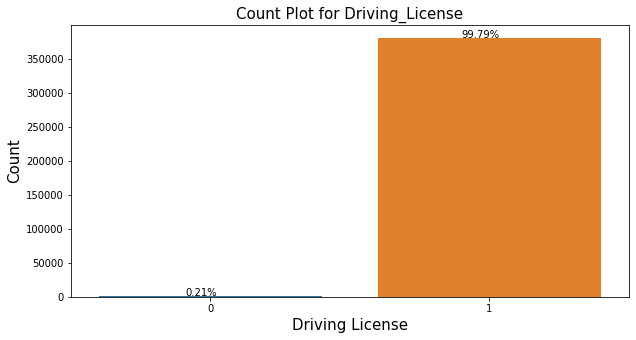

In [115]:
sns.countplot(df['Driving_License'])
plt.text(x = -0.09, y = df['Driving_License'].value_counts()[0] , s = str(round((df['Driving_License'].value_counts()[0])*100/len(df['Driving_License']),2)) + '%')
plt.text(x = 0.90, y = df['Driving_License'].value_counts()[1] , s = str(round((df['Driving_License'].value_counts()[1])*100/len(df['Driving_License']),2)) + '%')
plt.title('Count Plot for Driving_License', fontsize = 15)
plt.xlabel('Driving License', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()
# Majority of Customers have Driving License. 

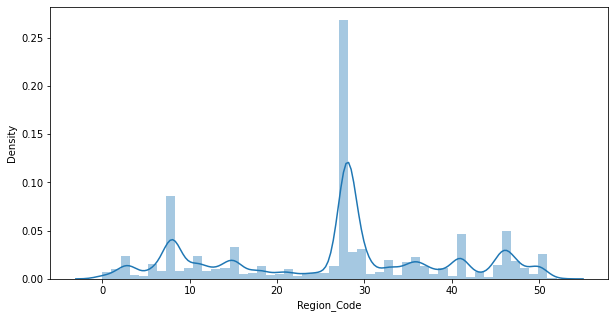

In [116]:
sns.distplot(df['Region_Code'])
plt.show()
# Data spread is almost equal among all,except region code 28.

In [117]:
    # 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
      #  'Policy_Sales_Channel', 'Vintage', 'Response'],

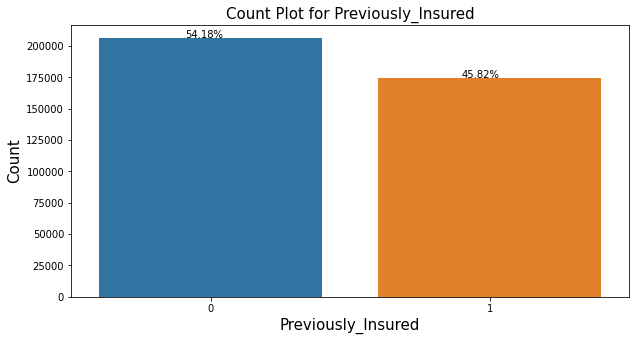

In [118]:
sns.countplot(df['Previously_Insured'])
plt.text(x = -0.09, y = df['Previously_Insured'].value_counts()[0] , s = str(round((df['Previously_Insured'].value_counts()[0])*100/len(df['Previously_Insured']),2)) + '%')
plt.text(x = 0.90, y = df['Previously_Insured'].value_counts()[1] , s = str(round((df['Previously_Insured'].value_counts()[1])*100/len(df['Previously_Insured']),2)) + '%')
plt.title('Count Plot for Previously_Insured', fontsize = 15)
plt.xlabel('Previously_Insured', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()
# More than 50% of the customers have not insured previously

In [119]:
df["Vehicle_Age"].value_counts(1)

1-2 Year     0.525613
< 1 Year     0.432385
> 2 Years    0.042001
Name: Vehicle_Age, dtype: float64

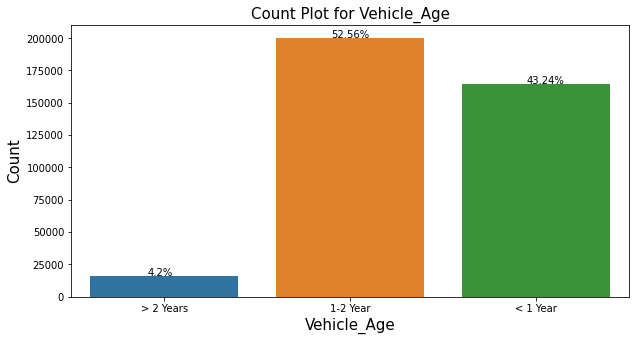

In [120]:
sns.countplot(df['Vehicle_Age'])
plt.text(x = -0.09, y = df['Vehicle_Age'].value_counts()[2] , s = str(round((df['Vehicle_Age'].value_counts()[2])*100/len(df['Vehicle_Age']),2)) + '%')
plt.text(x = 0.90, y = df['Vehicle_Age'].value_counts()[0] , s = str(round((df['Vehicle_Age'].value_counts()[0])*100/len(df['Vehicle_Age']),2)) + '%')
plt.text(x = 1.95, y = df['Vehicle_Age'].value_counts()[1] , s = str(round((df['Vehicle_Age'].value_counts()[1])*100/len(df['Vehicle_Age']),2)) + '%')
plt.title('Count Plot for Vehicle_Age', fontsize = 15)
plt.xlabel('Vehicle_Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()
#52.56% of the customers has a vehicle age of 1-2 year

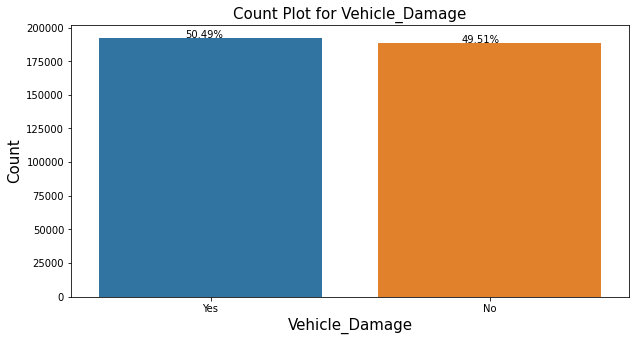

In [121]:
sns.countplot(df['Vehicle_Damage'])
plt.text(x = -0.09, y = df['Vehicle_Damage'].value_counts()[0] , s = str(round((df['Vehicle_Damage'].value_counts()[0])*100/len(df['Vehicle_Damage']),2)) + '%')
plt.text(x = 0.9, y = df['Vehicle_Damage'].value_counts()[1] , s = str(round((df['Vehicle_Damage'].value_counts()[1])*100/len(df['Vehicle_Damage']),2)) + '%')
plt.title('Count Plot for Vehicle_Damage', fontsize = 15)
plt.xlabel('Vehicle_Damage', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()
# 50% of the customers vehicle are damaged

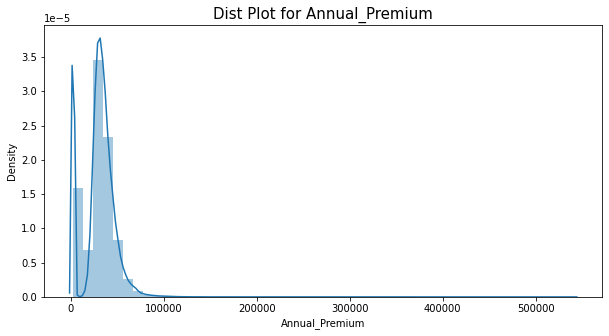

In [122]:
sns.distplot(df['Annual_Premium'])
plt.title('Dist Plot for Annual_Premium', fontsize = 15)
plt.show()
# Data is Right skewed.
# Majority of customers have annual premium < 100k

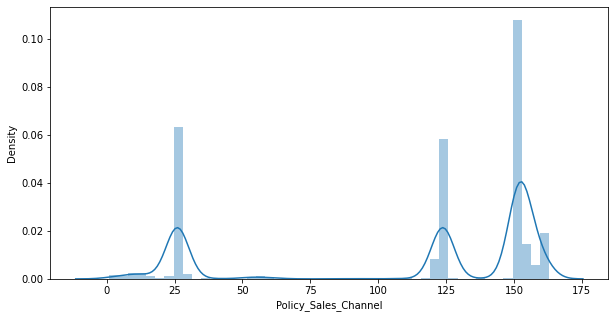

In [123]:
sns.distplot(df['Policy_Sales_Channel'])
plt.show()
# From below we can say that 25,125 and ~150 are major contributing policy sales channel

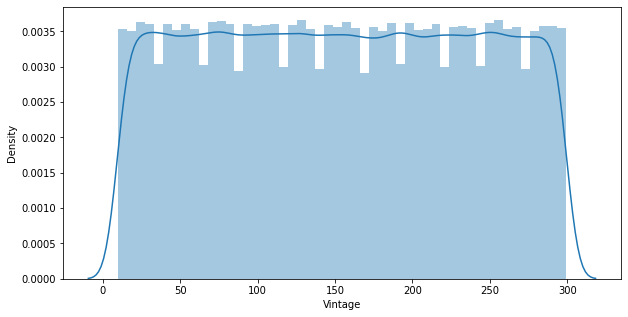

In [124]:
sns.distplot(df['Vintage'])
plt.show()
# Distribution is uniform

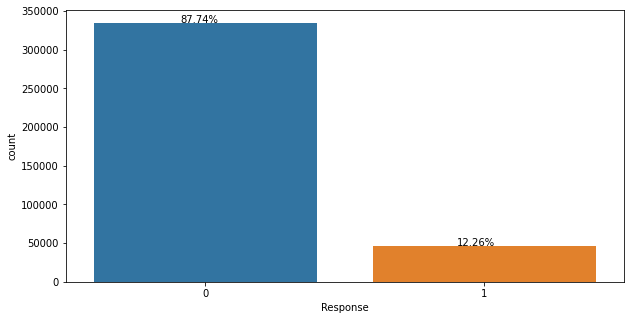

In [125]:
sns.countplot(df['Response'])
plt.text(x = -0.09, y = df['Response'].value_counts()[0] , s = str(round((df['Response'].value_counts()[0])*100/len(df['Response']),2)) + '%')
plt.text(x = 0.9, y = df['Response'].value_counts()[1] , s = str(round((df['Response'].value_counts()[1])*100/len(df['Response']),2)) + '%')
plt.show()
# Target variable is imbalanced

In [126]:
df['Driving_License']= df['Driving_License'].astype(object)
df['Previously_Insured']= df['Previously_Insured'].astype(object)
df['Region_Code']= df['Region_Code'].astype(object)
df['Policy_Sales_Channel']= df['Policy_Sales_Channel'].astype(object)

In [127]:
(df['Policy_Sales_Channel'].value_counts(1)*100).head()

152.0    35.366260
26.0     20.912652
124.0    19.415705
160.0     5.714638
156.0     2.797362
Name: Policy_Sales_Channel, dtype: float64

In [128]:
df['Policy_Sales_Channel']= df['Policy_Sales_Channel'].replace({152:0,26:1,124:2})

In [129]:
idx=df[df['Policy_Sales_Channel'] > 2].index
df.loc[idx,'Policy_Sales_Channel']= 3

In [130]:
(df['Policy_Sales_Channel'].value_counts(1)*100).head()

0.0    35.366260
3.0    24.022524
1.0    21.194461
2.0    19.416755
Name: Policy_Sales_Channel, dtype: float64

In [131]:
df.set_index(keys='id',inplace=True)

In [132]:
# Bi variate Analysis
# Numerical vs Numerical

In [133]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [134]:
df_num.columns

Index(['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'], dtype='object')

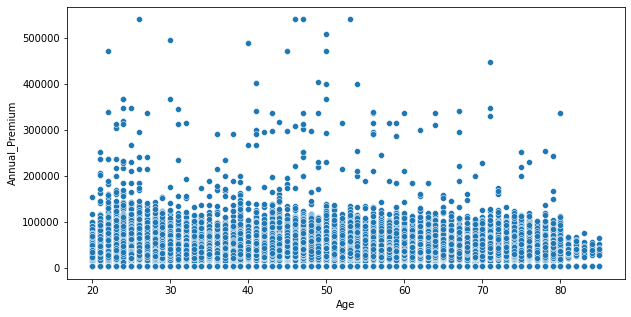

In [135]:
sns.scatterplot(df_num['Age'],df_num['Annual_Premium'])
plt.show()
# there is no relation between age and Annual_Premium

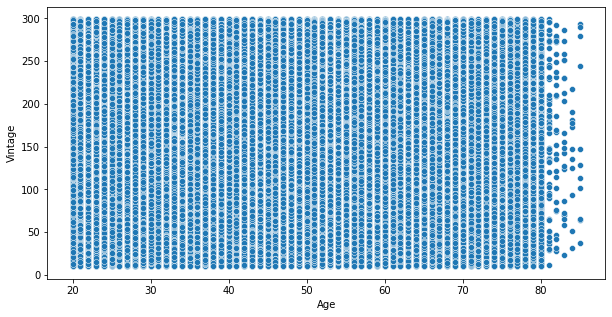

In [136]:
sns.scatterplot(df_num['Age'],df_num['Vintage'])
plt.show()
#there is no relation between age and Vintage 

In [137]:
# There is no relationship between age and Vintage

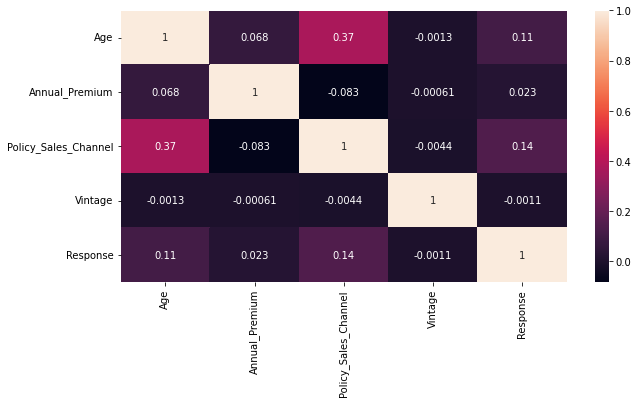

In [138]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()
# We dont have any strong correlation between the independent and dependent features

## Bivariate Analysis (Numerical vs Categorical)

In [139]:
df_num.columns,df_cat.columns

(Index(['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'], dtype='object'),
 Index(['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
        'Vehicle_Age', 'Vehicle_Damage'],
       dtype='object'))

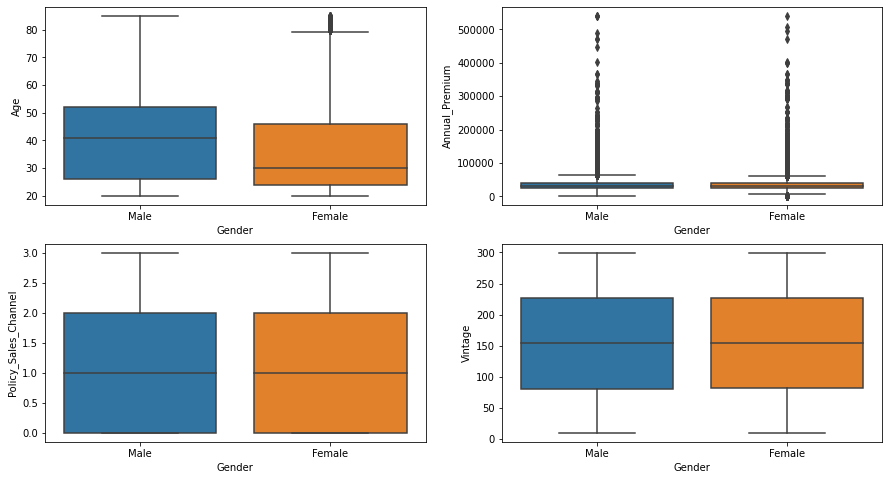

In [140]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
  if variable == "Response":
    continue
  else:
    sns.boxplot(x = df["Gender"],y = df_num[variable], ax = subplot)
plt.show()

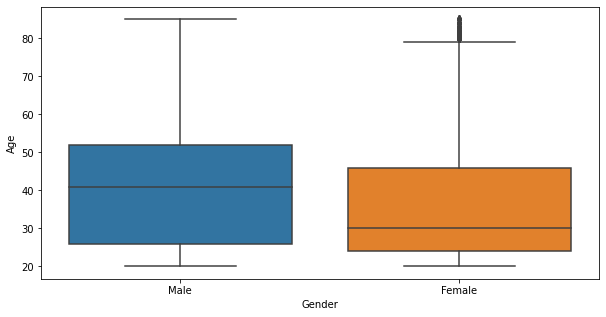

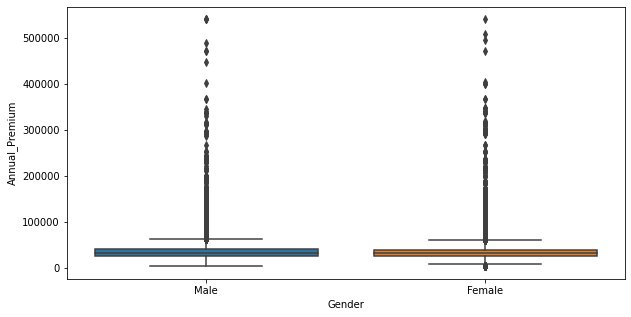

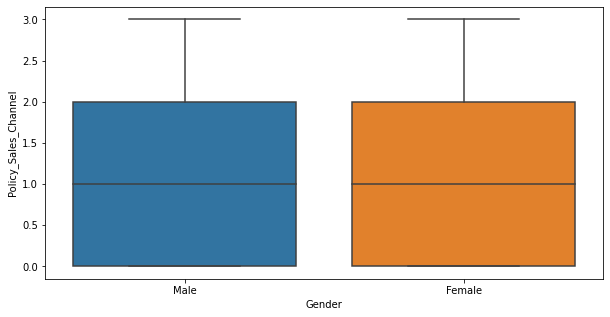

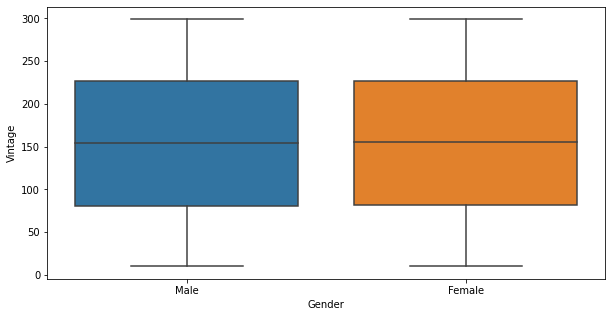

In [141]:
for i in df_num.columns:
  if i =='Response':
    continue
  else:
    sns.boxplot(x= df['Gender'],y=df[i])
    plt.show()

### Inference:(Gender vs Numerical )
1.Average Age for male is more as compared to Female.

2.Average Annual Premium for male is same as compared to Female.

3.Average number of days with in the company is same for Male and Female.


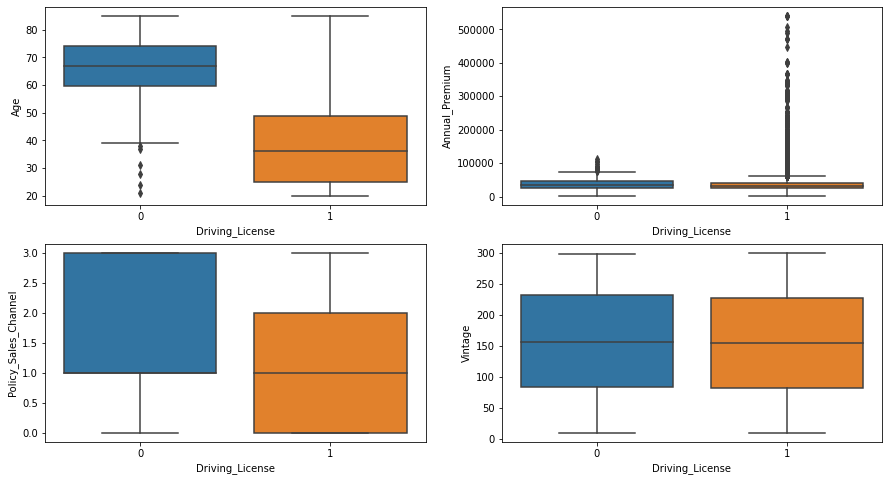

In [142]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
  if variable == "Response":
    continue
  else:
    sns.boxplot(x = df["Driving_License"],y = df_num[variable], ax = subplot)
plt.show()

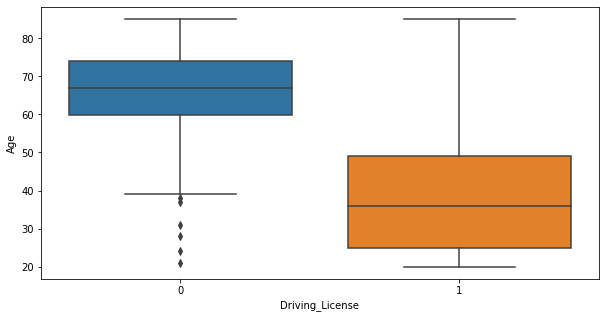

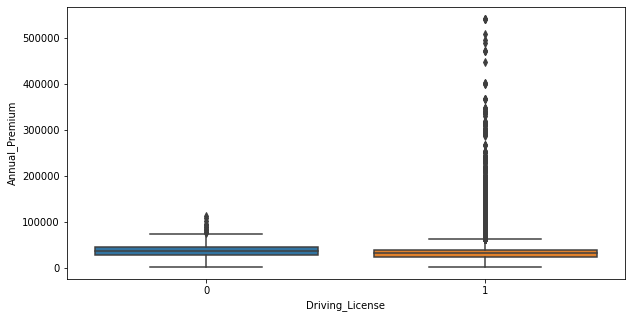

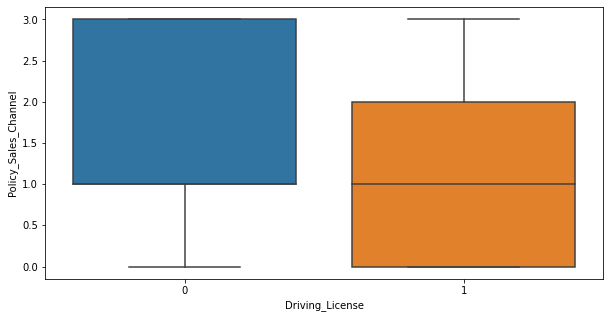

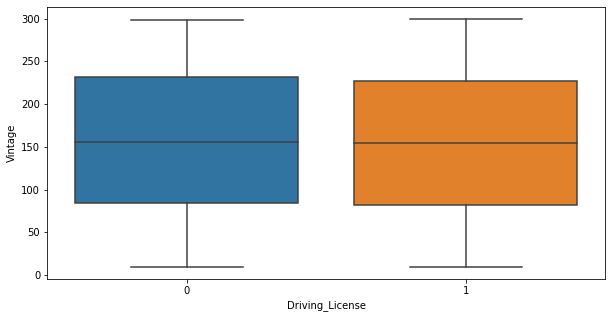

In [143]:
for i in df_num.columns:
  if i =='Response':
    continue
  else:
    sns.boxplot(x= df['Driving_License'],y=df[i])
    plt.show()

### Inference ( Driving License vs Numerical)
1. Customers of Age group between 25 to 50 have Driving License.
2. Customers having driving license have high annaul premium.
3. Average number of days associated with the company is same for customers having driving license and not having driving license.

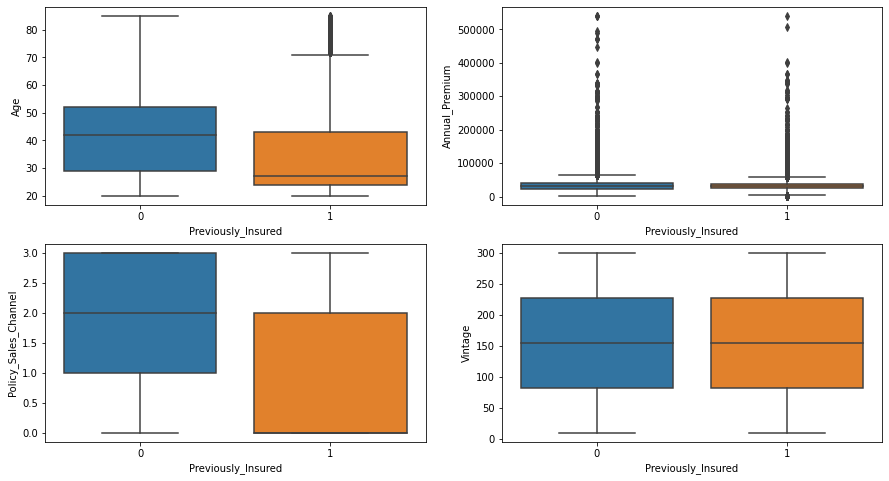

In [144]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
  if variable == "Response":
    continue
  else:
    sns.boxplot(x = df["Previously_Insured"],y = df_num[variable], ax = subplot)
plt.show()

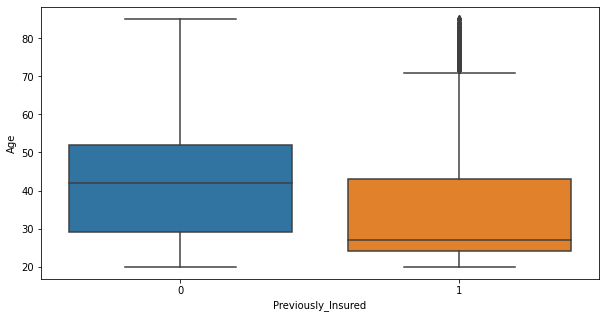

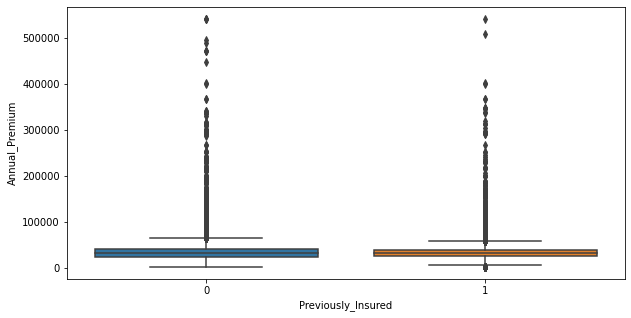

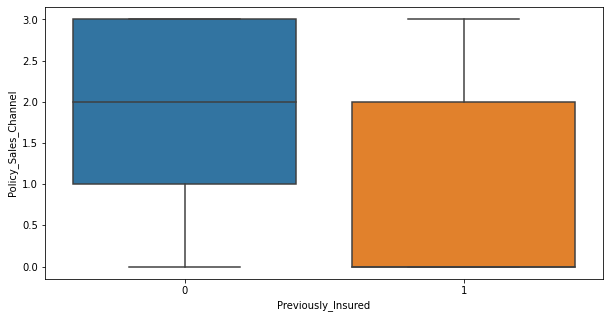

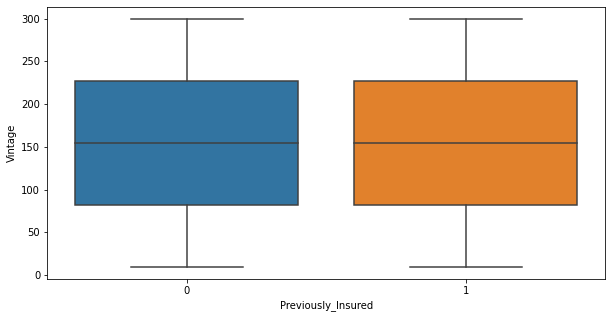

In [145]:
for i in df_num.columns:
  if i =='Response':
    continue
  else:
    sns.boxplot(x= df['Previously_Insured'],y=df[i])
    plt.show()

### Inference ( Previously Insured Vs Numerical)

1.Customers of age group~(40-50) have not insured previously.

2.Annual Premium is extremly high for not previously insured and previously insured customer.

3.Average vintage is same for the bot the customers.


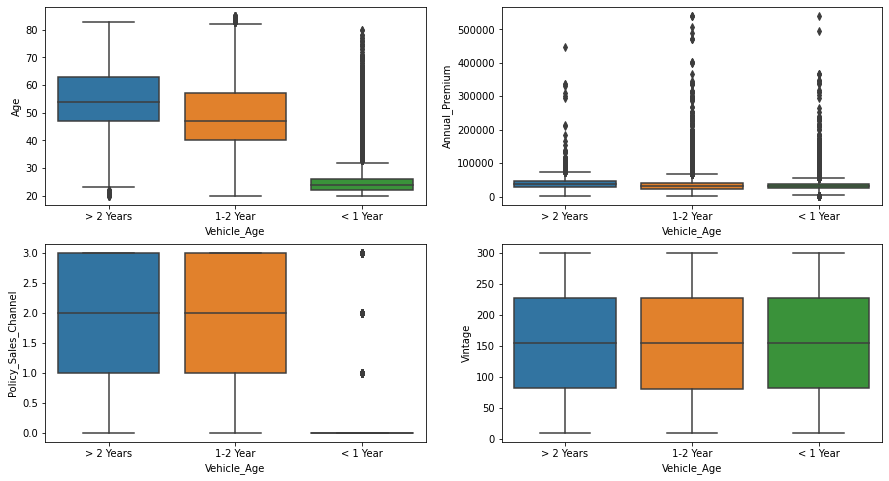

In [146]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
  if variable == "Response":
    continue
  else:
    sns.boxplot(x = df["Vehicle_Age"],y = df_num[variable], ax = subplot)
plt.show()

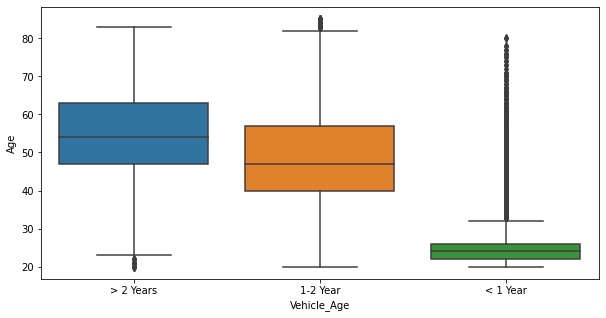

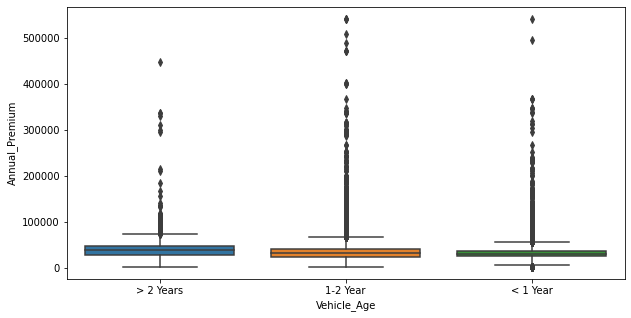

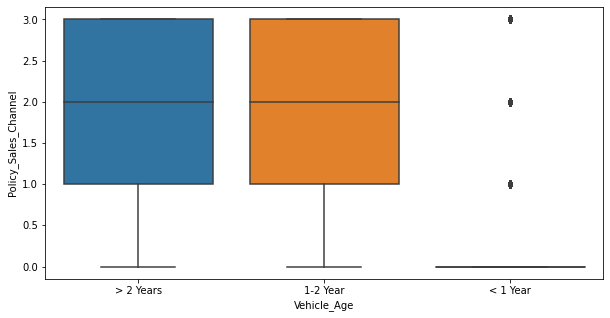

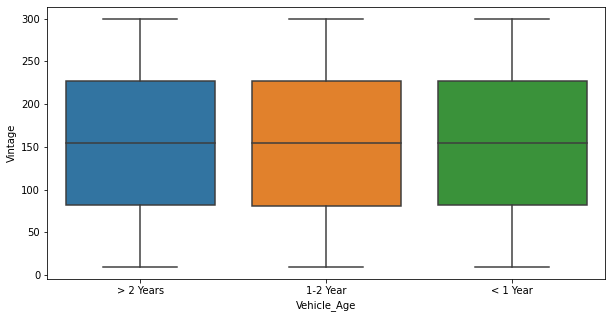

In [147]:
for i in df_num.columns:
  if i =='Response':
    continue
  else:
    sns.boxplot(x= df['Vehicle_Age'],y=df[i])
    plt.show()

### Inference (Vehicle Age Vs Numerical )
1.customer vehicle with less than 1 year have least age.

2.Average Annaul premium is same for all categories in vehicle age.

3.Average Vintage is same for all the categories in vehicle age.

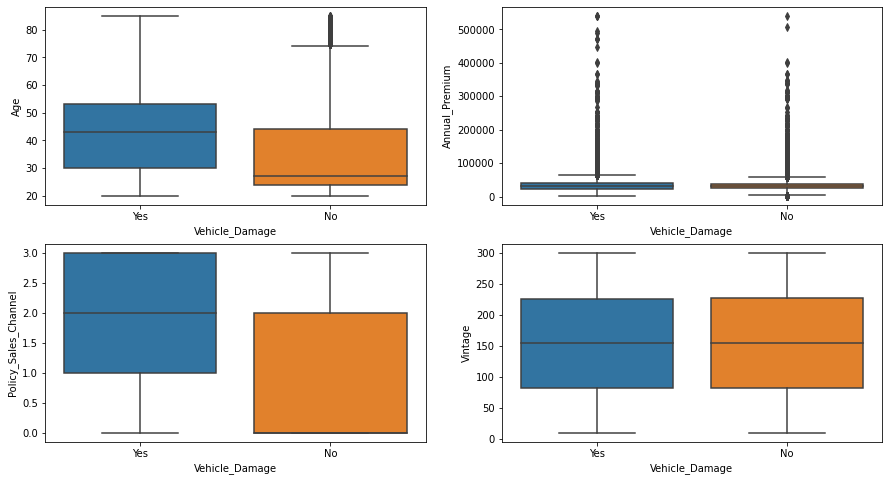

In [148]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15, 8))
for variable, subplot in zip(df_num.columns, ax.flatten()):
  if variable == "Response":
    continue
  else:
    sns.boxplot(x = df["Vehicle_Damage"],y = df_num[variable], ax = subplot)
plt.show()

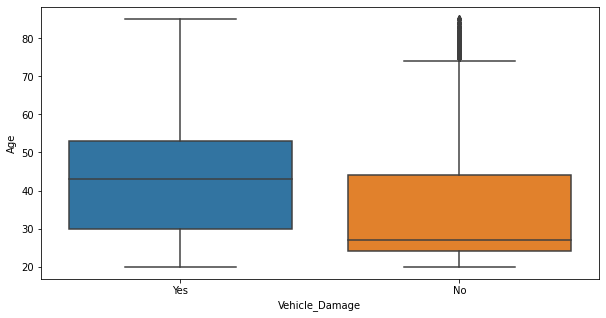

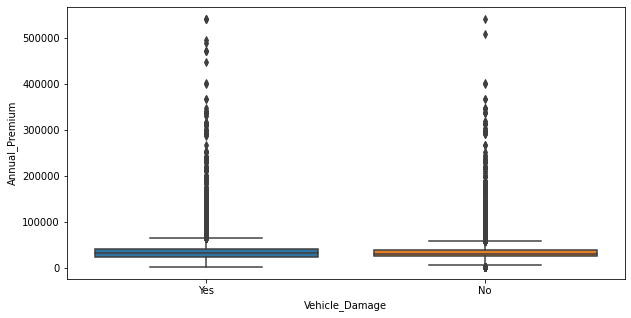

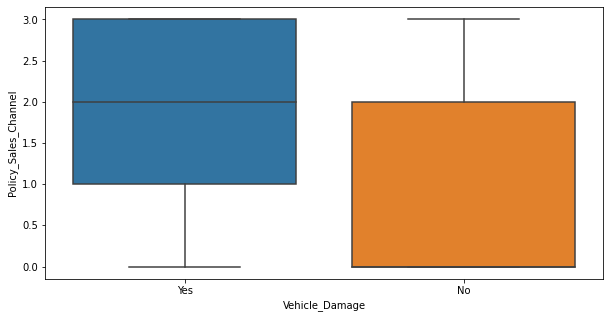

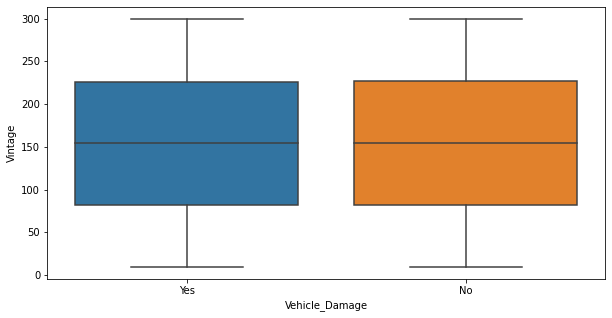

In [149]:
for i in df_num.columns:
  if i =='Response':
    continue
  else:
    sns.boxplot(x= df['Vehicle_Damage'],y=df[i])
    plt.show()

###Inference ( Vehical Damage Vs Numerical)
1.Customers of age group 40-50 have damaged their vehicles previously.

2.Average annual premium is same for yes and No category in vehicle damage.

3.Average vinatge is same for both.

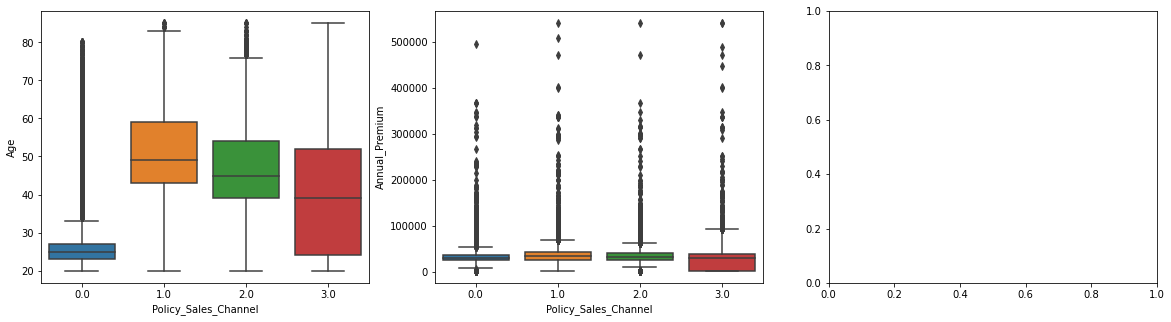

In [150]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(20, 5))
for variable, subplot in zip(df_num.columns, ax.flatten()):
  if variable == "Response" or variable == "Policy_Sales_Channel":
    continue
  else:
    sns.boxplot(x = df["Policy_Sales_Channel"],y = df_num[variable], ax = subplot)
plt.show()

#Better to use the normal one for this inference alone

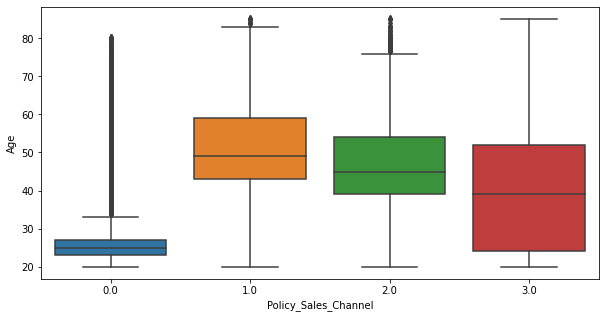

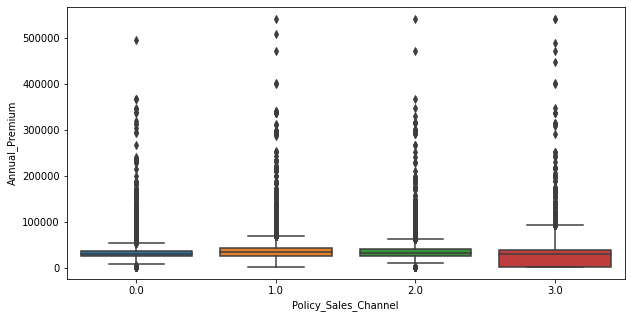

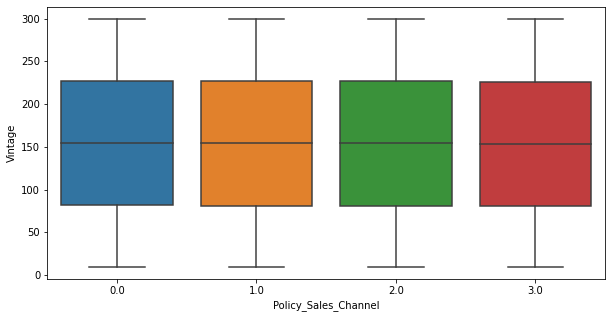

In [151]:
for i in df_num.columns:
  if i =='Response' or i == "Policy_Sales_Channel":
    continue
  else:
    sns.boxplot(x= df['Policy_Sales_Channel'],y=df[i])
    plt.show()

## categorical vs categorical

In [152]:
df_cat.columns

Index(['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage'],
      dtype='object')

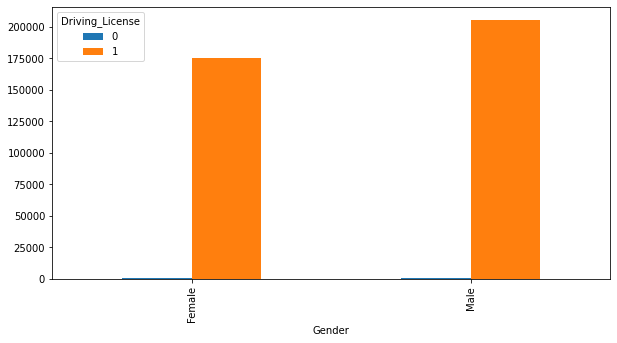

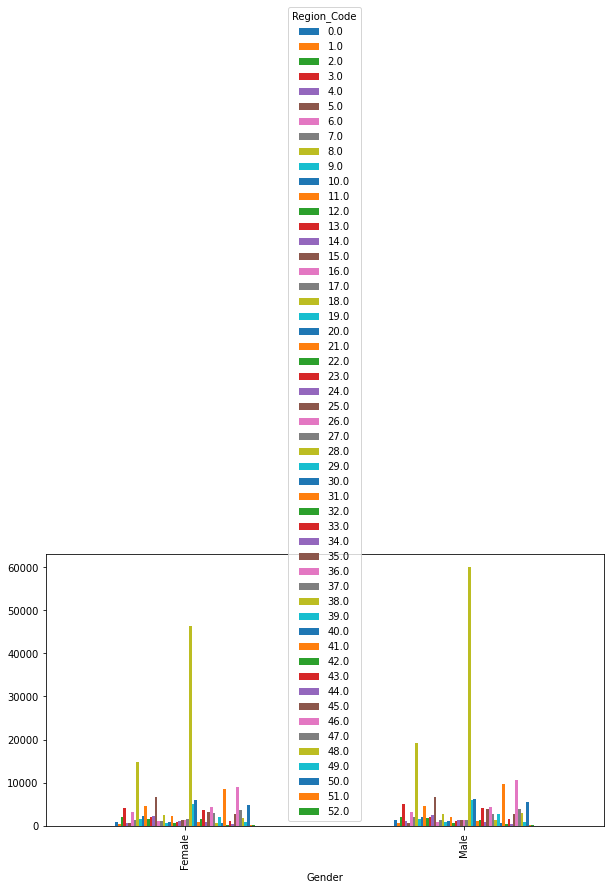

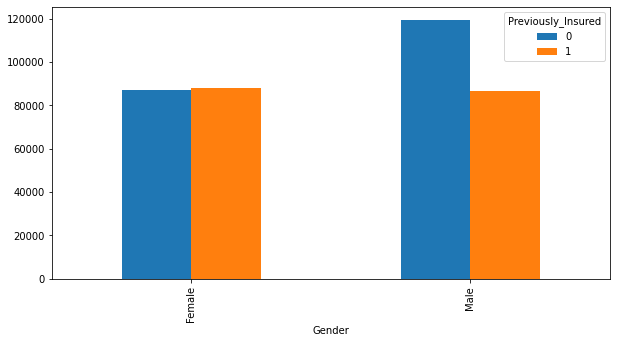

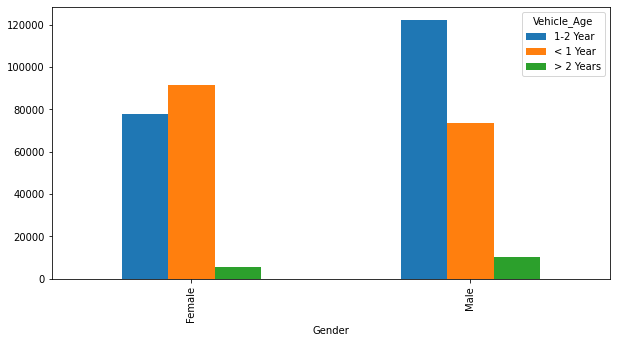

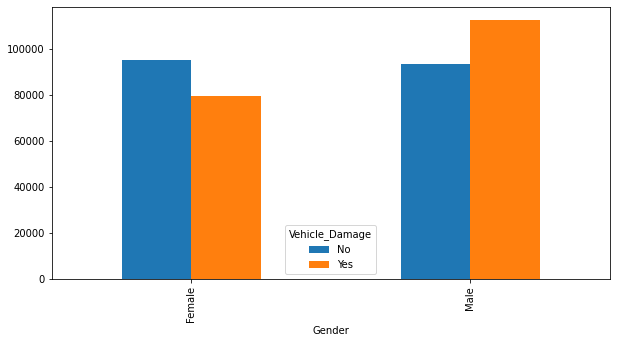

In [153]:
for i in df_cat.columns:
  if i == 'Gender':
    continue
  else:
    pd.crosstab(df['Gender'],df[i]).plot(kind='bar')
    plt.show()
# Inference (Gender vs categorical)
#Male customers count is more comapared to female.
#Region code 38 has more customers compared to others
# Most of the male customers have not previously insured compared to female customers
# There are more number of female customers whose vehicle age is less than 1 and there are more number of male customers 
# whose vehicle age is between 1-2 years
# Vehicle damage is more for male customers compared to female customers
# Majority of the customers has been reached through agents irrespective of the gender(i.e 0)



# Inference (Gender vs categorical)
1.Male customers count is more comapared to female.

2.Region code 38 has more customers compared to others

3.Most of the male customers have not previously insured compared to female customers

4.There are more number of female customers whose vehicle age is less than 1 and there are more number of male customers whose vehicle age is between 1-2 years

5.Vehicle damage is more for male customers compared to female customers

6.Majority of the customers has been reached through agents irrespective of the gender

---



```
```



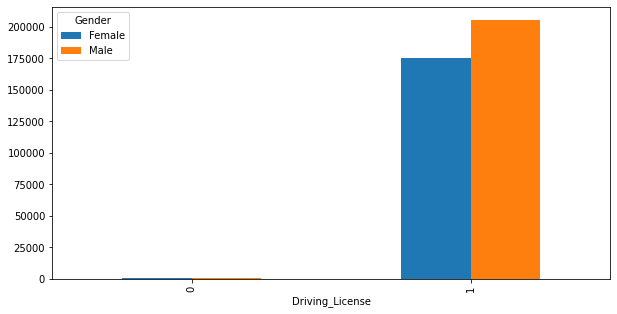

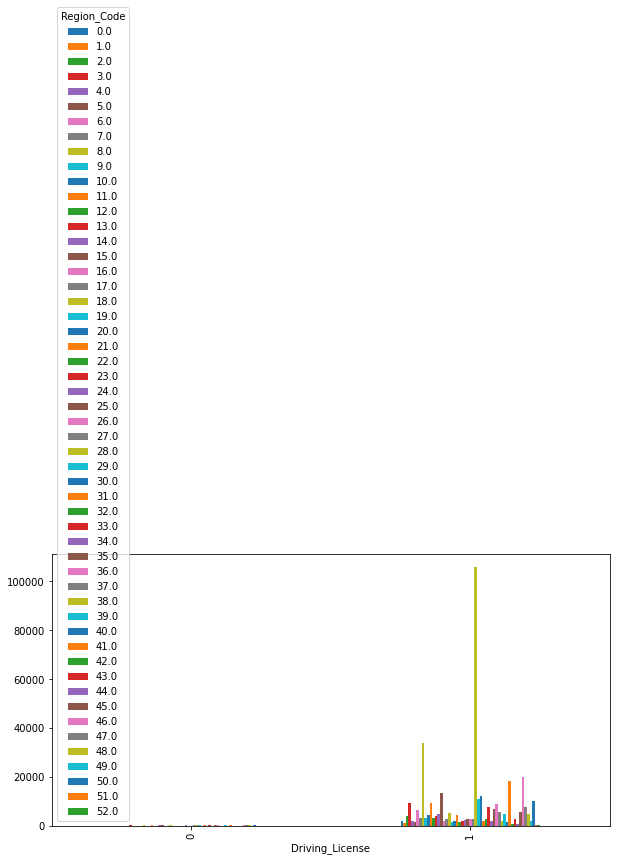

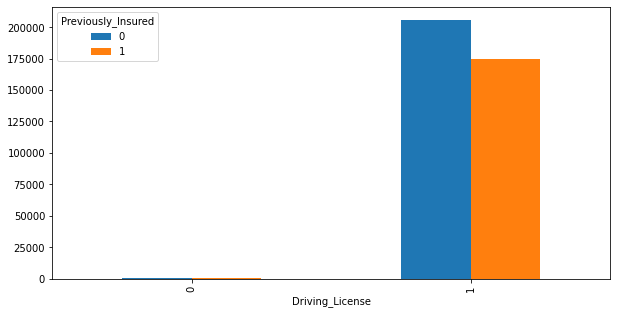

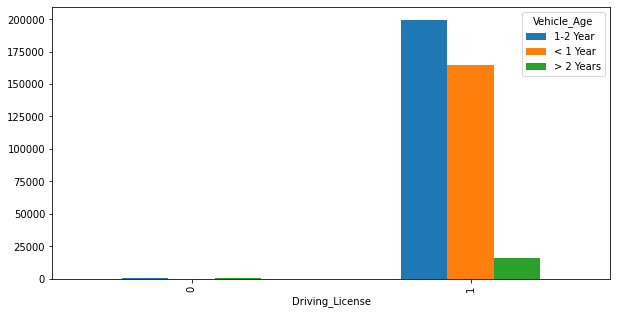

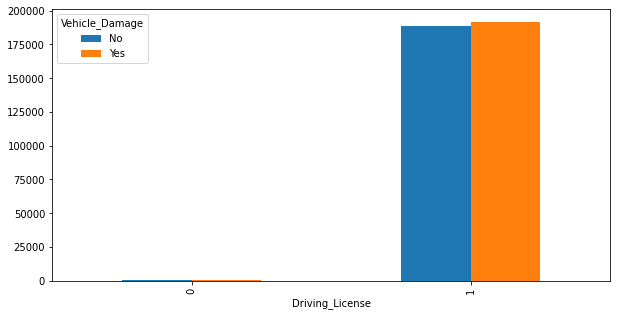

In [154]:
for i in df_cat.columns:
  if i == 'Driving_License':
    continue
  else:
    pd.crosstab(df['Driving_License'],df[i]).plot(kind='bar')
    plt.show()

#Inferences (Driving License Vs Categorical)

1.More number of Male Customers has driving license compared to female customers

2.More number of Customers from region code 38 has driving license compared to customers from other regions.

3.Most of the customers having driving license are not previously insured.

4.Most of the customers having driving license has a vehicle age between 1-2.

5.The Vehice damage ratio is almost similar for customers having driving license

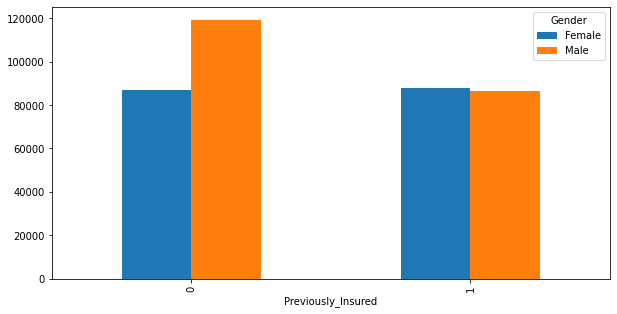

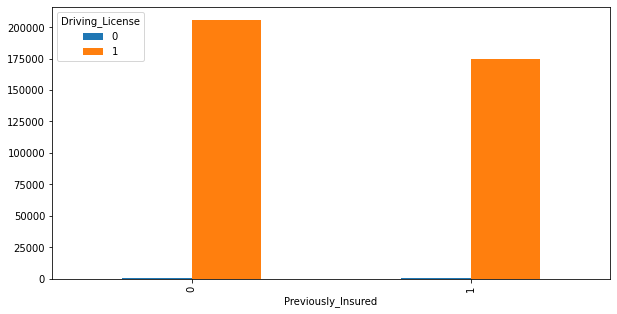

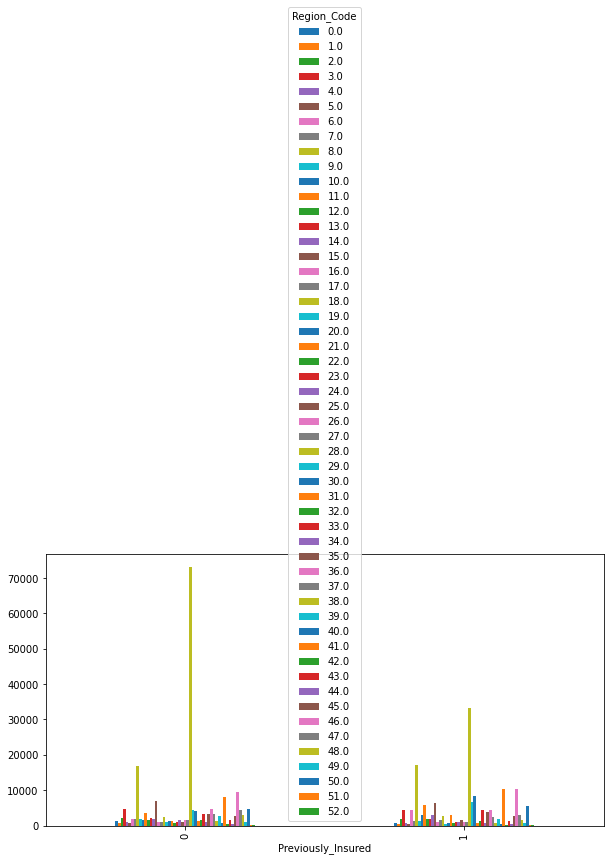

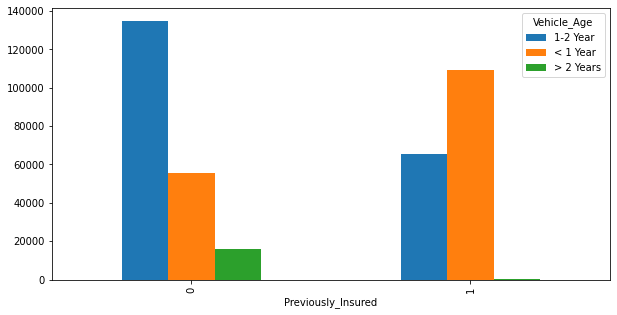

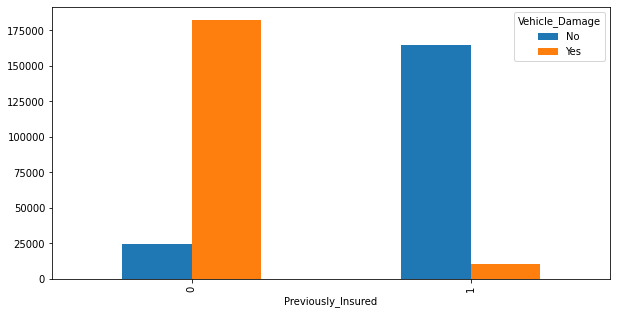

In [155]:
for i in df_cat.columns:
  if i == 'Previously_Insured':
    continue
  else:
    pd.crosstab(df['Previously_Insured'],df[i]).plot(kind='bar')
    plt.show()

#Inferences (Previously Insured Vs Categorical)

1.Most of the male customers are not previously insured than female customers

2.Most of the customers have driving liscence and they are not previously insured

3.Most of the customers who are not previously insured are from region 38

4.Most of the customers whose vehicle age is between 1-2 are not previously insured

5.Most of the customers who are not previously insured have more vehicle damage
and most of the customers who have already insured has no vehicle damage.

In [156]:
# cross1 = pd.crosstab(df["Vehicle_Age"],df["Gender"])
# cross2 = pd.crosstab(df["Vehicle_Age"],df["Driving_License"])
# cross3 = pd.crosstab(df["Vehicle_Age"],df["Previously_Insured"])
# cross4 = pd.crosstab(df["Vehicle_Age"],df["Vehicle_Damage"])

# fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(2,2, figsize = (20,6))
# ax1 = cross1.plot(kind='bar', stacked=True, rot=0)
# ax2 = cross2.plot(kind='bar', stacked=True, rot=0)
# ax3 = cross3.plot(kind = "bar",stacked = True,rot = 0)
# ax4 = cross4.plot(kind = "bar",stacked = True,rot = 0)
# plt.show()


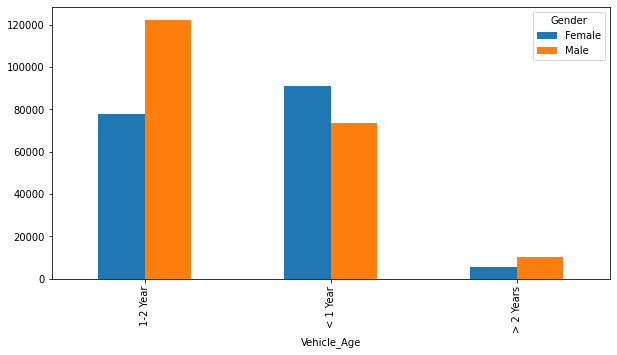

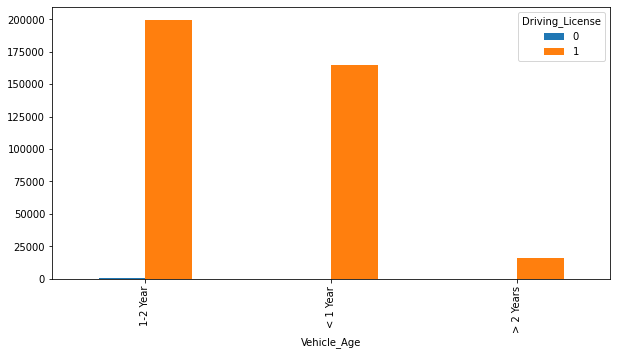

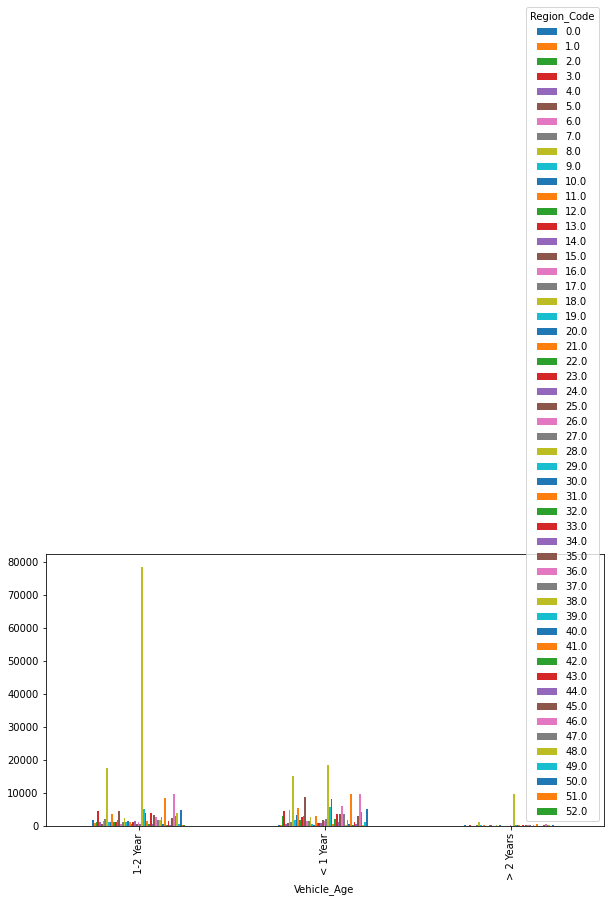

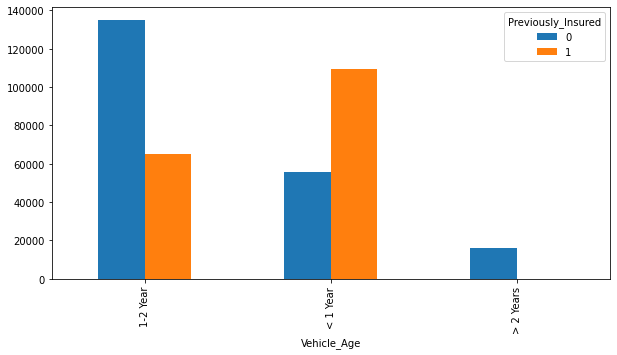

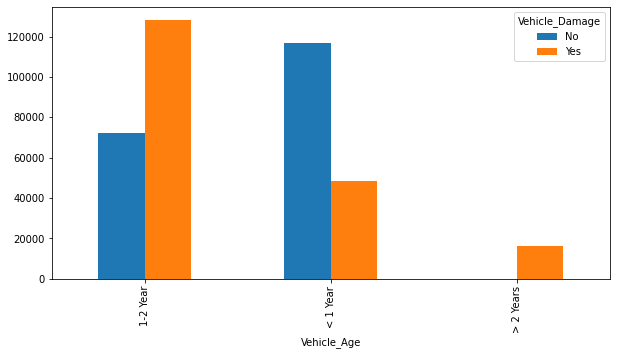

In [157]:
for i in df_cat.columns:
  if i == 'Vehicle_Age':
    continue
  else:
    pd.crosstab(df['Vehicle_Age'],df[i]).plot(kind='bar')
    plt.show()

#Inferences (Vehicle Age vs categorical)

1.Most of the female customers vehicle age is between 1-2 years

2.In region code 38 most of the customers vehicle age is 1-2 years

3.Most of the customers whose vehicle age is between 1-2 years are not previously insured.

4.Most of the customers whose vehicle age is less than 1 has no vehicle damage


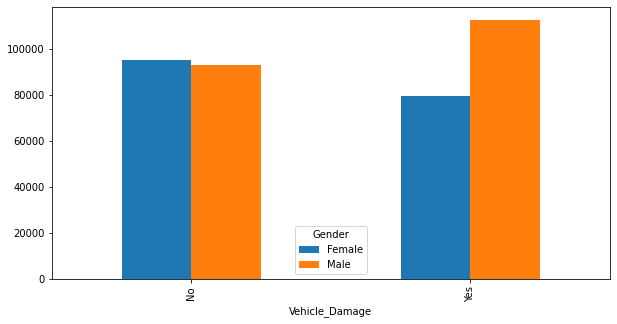

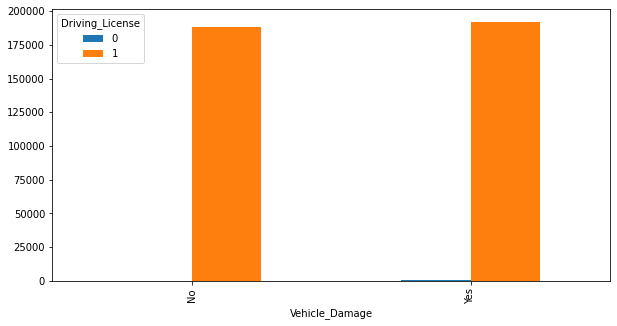

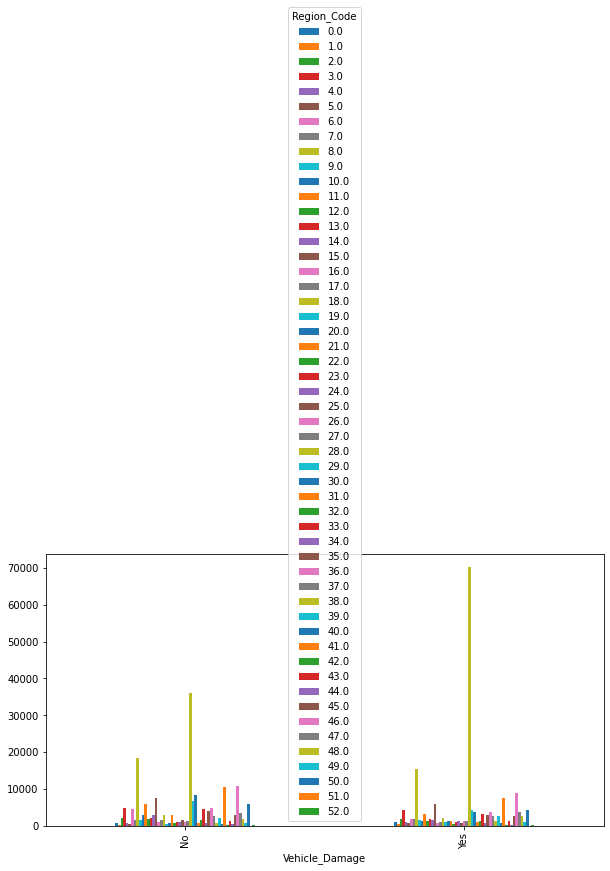

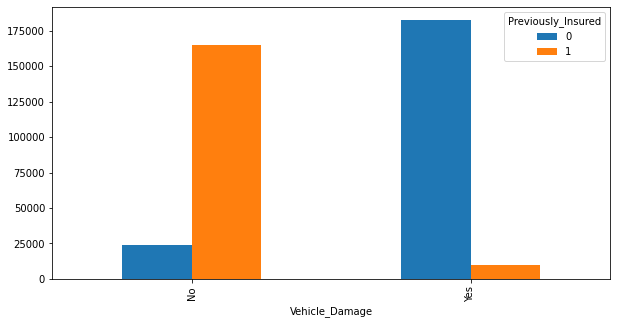

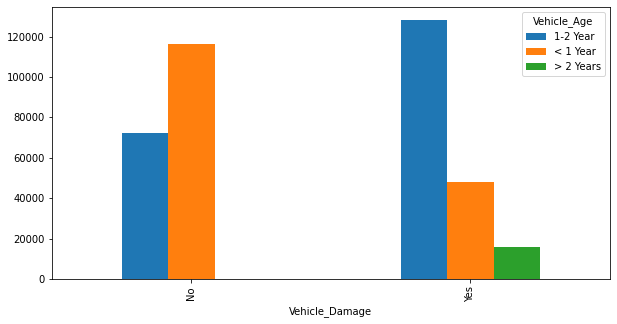

In [158]:
for i in df_cat.columns:
  if i == 'Vehicle_Damage':
    continue
  else:
    pd.crosstab(df['Vehicle_Damage'],df[i]).plot(kind='bar')
    plt.show()

#Inferences (Vehicle Damage vs Categorical)

1.There are more number of mae customers who has a vehicle damage compared to female customers.

2.More number of customers from region 38 has vehicle damage

3.There are more number of customers with vehicle damage who have not previously insured.

4.More number of customers with vehicle age between 1 to 2 has vehicle damage

In [159]:
# Multivariate
df_num.columns,df_cat.columns

(Index(['Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'], dtype='object'),
 Index(['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured',
        'Vehicle_Age', 'Vehicle_Damage'],
       dtype='object'))

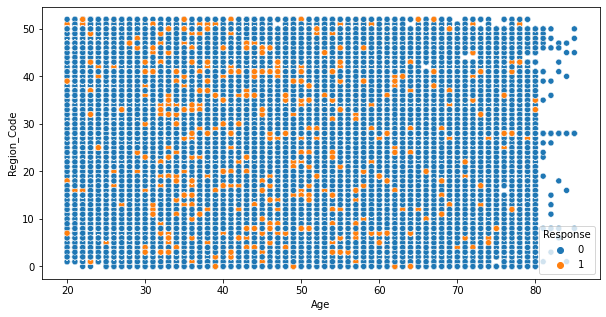

In [160]:
sns.scatterplot(df['Age'],df['Region_Code'],hue=df['Response'])
plt.show()

#Inferences

Since we have a massively imbalanced dataset we are not able to linearly seperate our data points based on region code and age.

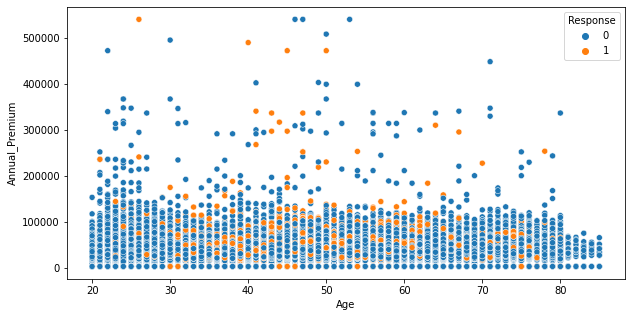

In [161]:
sns.scatterplot(df['Age'],df['Annual_Premium'],hue=df['Response'])
plt.show()

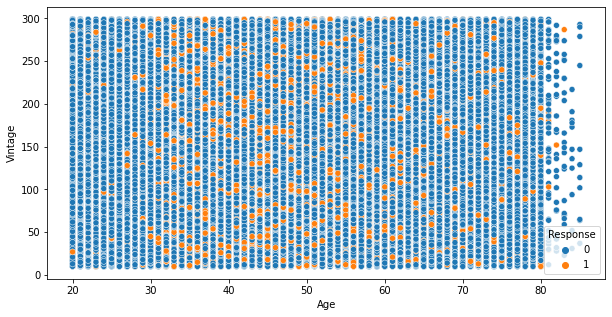

In [162]:
sns.scatterplot(df['Age'],df['Vintage'],hue=df['Response'])
plt.show()

#Inference
Since the target variable is massively imbalanced we are not able to find any kind of relationship between (Age,Vintage) and response.

In [163]:
df["Policy_Sales_Channel"] = df["Policy_Sales_Channel"].astype(object)
df["Policy_Sales_Channel"].dtype

dtype('O')

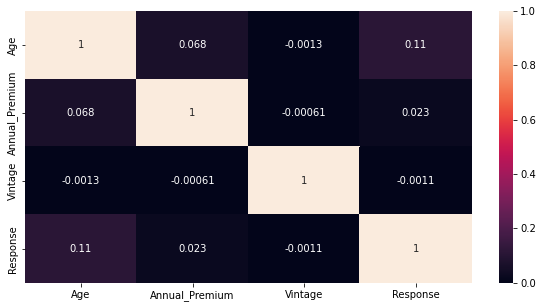

In [164]:
sns.heatmap(df.corr(),annot = True)
plt.show()

#Inferences 
From the above heatmap we can see that all the independent variables has very low correlation with the target variable.



#Statistical Testing

In [165]:
from scipy import stats


In [166]:
p_val = []
sig = []
for i in df.columns:
    if i in df_num:
        stat, p = stats.ttest_ind(df[df['Response'] == 0][i], df[df['Response'] == 1][i])
    else:
        ct = pd.crosstab(df[i], df['Response'])
        stat, p, dof, exp = stats.chi2_contingency(ct)
    p_val.append(p)
    if p < 0.05:
        sig.append('Significant')
    else:
        sig.append("Insignificant")
stats_df = pd.DataFrame({"columns" : df.columns, "p_value" : p_val, "significance" : sig})
stats_df

,columns,p_value,significance
0,Gender,7.665801e-230,Significant
1,Age,0.000000e+00,Significant
2,Driving_License,5.111754e-10,Significant
3,Region_Code,0.000000e+00,Significant
4,Previously_Insured,0.000000e+00,Significant
5,Vehicle_Age,0.000000e+00,Significant
6,Vehicle_Damage,0.000000e+00,Significant
7,Annual_Premium,3.722315e-44,Significant
8,Policy_Sales_Channel,0.000000e+00,Significant
9,Vintage,5.167037e-01,Insignificant


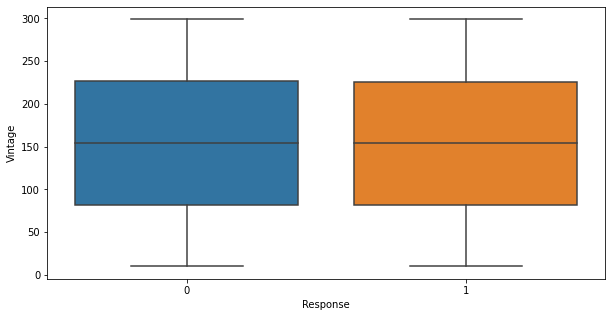

In [167]:
sns.boxplot(y = df["Vintage"],x= df["Response"])
plt.show()

#Inference

As we can see that vintage is not a good predictor because the spread of the data for both the labels 0 and 1 are exactly the same.

##Data Preprocessing
1.Checking null values

2.Treating Outliers

3.Encoding Categorical features

4.Scaling the data

5.Checking for Multicollinearity

In [168]:
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

##Inference
There are no null values in our data

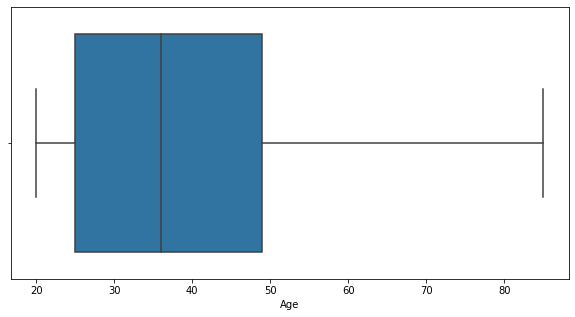

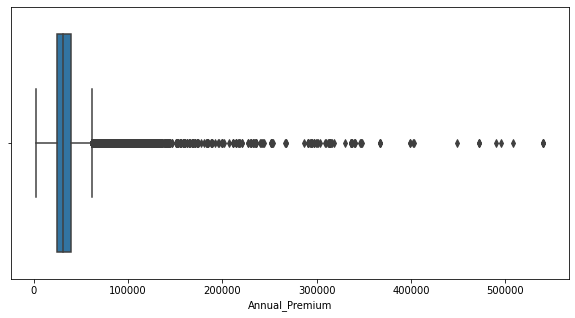

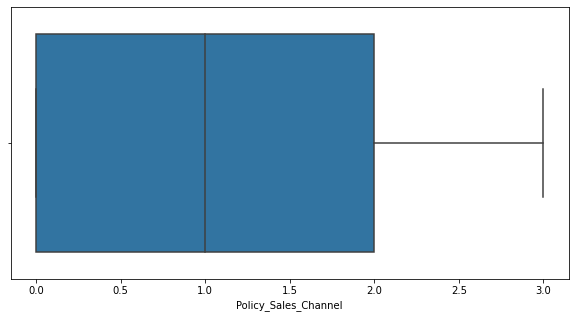

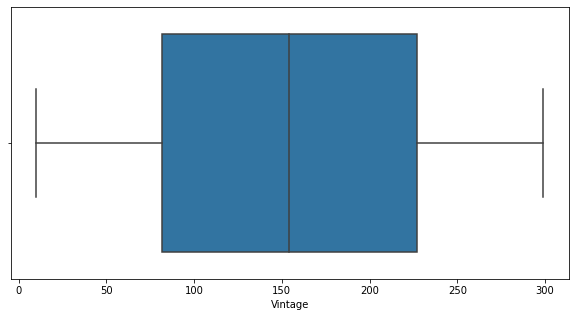

In [169]:
for i in df_num:
  if i == "Response":
    continue
  else:
    sns.boxplot(df_num[i])
    plt.show()


From the above boxplots we can see that the column Annual Premium has outliers 

In [170]:
df_num.describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,1.320955,154.347397,0.122563
std,15.511611,17213.155057,1.185632,83.671304,0.327936
min,20.000000,2630.000000,0.000000,10.000000,0.000000
25%,25.000000,24405.000000,0.000000,82.000000,0.000000
50%,36.000000,31669.000000,1.000000,154.000000,0.000000
75%,49.000000,39400.000000,2.000000,227.000000,0.000000
max,85.000000,540165.000000,3.000000,299.000000,1.000000


In [171]:
len(df_num[df_num["Annual_Premium"] == df_num["Annual_Premium"].max()])

4

In [172]:
df_employee = pd.read_csv("DataSet.csv")

In [173]:
Q1 = df_employee.quantile(0.25)

#calculate the third quartile
Q3 = df_employee.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

df_employee = df_employee[~((df_employee < (Q1 - 1.5 * IQR)) | (df_employee > (Q3 + 1.5 * IQR))).any(axis=1)]
df_employee.shape


(324911, 12)

In [174]:
df.shape

(381109, 11)

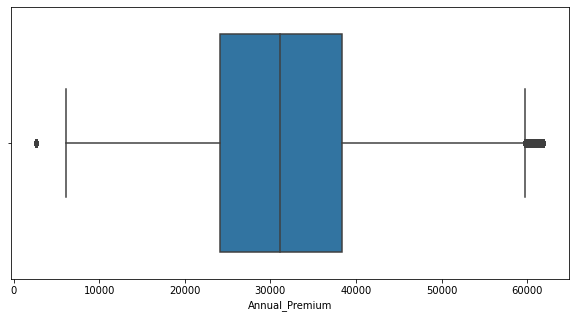

In [175]:
sns.boxplot(df_employee["Annual_Premium"])

In [176]:
s = ((len(df) - len(df_employee))/len(df))*100

##Inferences

**If we remove the outliers using IQR method we are loosing around 15% of the data points and still there are some outliers left even after removing
i.e(out of 381k points we will be loosing 56k points ) which leads to 
loss of information.

**Hence we are proceeding the with capping  all the outlier points to the 99th percentile value to prevent the loss of information.

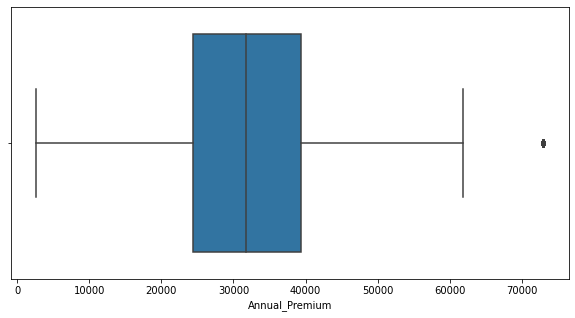

In [177]:
def cap(s):
    q1= df_num[s].quantile(0.25)
    q3= df_num[s].quantile(0.75)
    iqr= q3 -q1
    ub= q3 + 1.5 * iqr 
    lb= q1 - 1.5 * iqr
    uc = df_num[s].quantile(0.99)
    lc = df_num[s].quantile(0.01)
    ind1=df_num[df_num[s] > ub].index
    ind2=df_num[df_num[s] < lb].index
    df_num.loc[ind1,s]=uc
    df_num.loc[ind2,s]=lc

cap("Annual_Premium")
sns.boxplot(df_num["Annual_Premium"])
plt.show()

In [178]:
len(df_num[df_num["Annual_Premium"] == df_num["Annual_Premium"].max()])

10320

In [179]:

q1= df["Annual_Premium"].quantile(0.25)
q3= df["Annual_Premium"].quantile(0.75)
iqr= q3 -q1
ub= q3 + 1.5 * iqr 
lb= q1 - 1.5 * iqr
uc = df["Annual_Premium"].quantile(0.99)
lc = df["Annual_Premium"].quantile(0.01)
ind1=df[df["Annual_Premium"] > ub].index
ind2=df[df["Annual_Premium"] < lb].index
df.loc[ind1,"Annual_Premium"]=uc
df.loc[ind2,"Annual_Premium"]=lc



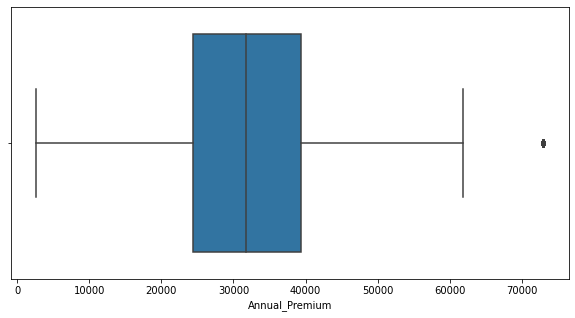

In [180]:
sns.boxplot(df["Annual_Premium"])

In [181]:
len(df[df["Annual_Premium"] == df["Annual_Premium"].max()])

10320

In [182]:
idx = df[df["Annual_Premium"] == df["Annual_Premium"].max()].index

In [183]:
df.drop(index = idx,inplace = True)

In [184]:
df.shape

(370789, 11)

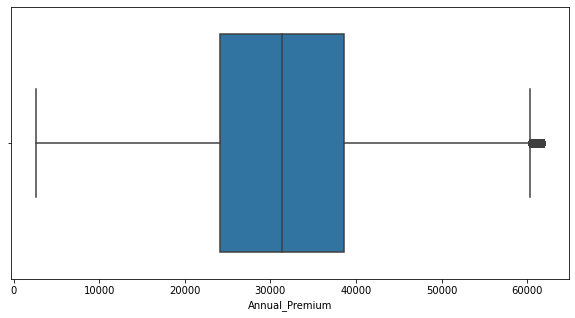

In [185]:
sns.boxplot(df["Annual_Premium"])

In [186]:
len(df[df["Annual_Premium"] > 60000])

1839

In [187]:
ind = df[df["Annual_Premium"] > 60000].index

In [188]:
df.drop(index = ind,inplace = True)
df.shape

(368950, 11)

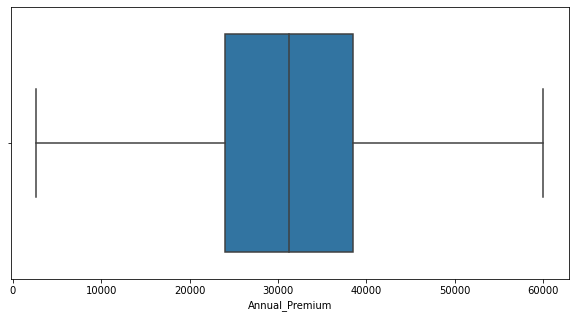

In [189]:
sns.boxplot(df["Annual_Premium"])

##Inference 
After outlier Treatment 13k rows has been removed approximately.





In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368950 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                368950 non-null  object 
 1   Age                   368950 non-null  int64  
 2   Driving_License       368950 non-null  object 
 3   Region_Code           368950 non-null  object 
 4   Previously_Insured    368950 non-null  object 
 5   Vehicle_Age           368950 non-null  object 
 6   Vehicle_Damage        368950 non-null  object 
 7   Annual_Premium        368950 non-null  float64
 8   Policy_Sales_Channel  368950 non-null  object 
 9   Vintage               368950 non-null  int64  
 10  Response              368950 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 33.8+ MB


In [191]:
df["Region_Code"] = df["Region_Code"].astype(int)
df["Response"] = df["Response"].astype(object)


In [192]:
num_df = df.select_dtypes(include = np.number)
cat_df = df.select_dtypes(exclude = np.number)
print(num_df.shape)
print(cat_df.shape)

(368950, 4)
(368950, 7)


In [193]:
cat_df.columns


Index(['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Policy_Sales_Channel', 'Response'],
      dtype='object')

In [194]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_num_scaled = sc.fit_transform(num_df)

df_scaled = pd.DataFrame(df_num_scaled,columns = num_df.columns)
df_scaled.describe()

,Age,Region_Code,Annual_Premium,Vintage
count,3.689500e+05,3.689500e+05,3.689500e+05,3.689500e+05
mean,1.803165e-16,2.710970e-16,-1.733848e-15,-1.317523e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.208560e+00,-1.984458e+00,-1.812375e+00,-1.725077e+00
25%,-8.843795e-01,-8.587822e-01,-3.461502e-01,-8.645083e-01
50%,-1.711823e-01,1.168032e-01,1.470408e-01,-3.939237e-03
75%,6.716872e-01,7.171634e-01,6.405055e-01,8.685821e-01
max,3.005787e+00,1.917884e+00,2.114671e+00,1.729151e+00


In [195]:
df_scaled.shape
df_scaled.drop(columns = "Region_Code",inplace = True,axis = 1)

In [196]:
cat_df1 = pd.get_dummies(cat_df,drop_first = True)
cat_df1 = pd.DataFrame(cat_df1,columns = cat_df1.columns)

cat_df1.shape,num_df.shape



((368950, 10), (368950, 4))

In [197]:
cat_df2 = pd.concat([cat_df1,num_df["Region_Code"]],axis = 1)
cat_df2.shape

(368950, 11)

In [198]:
df_scaled.shape,cat_df2.shape

df_scaled.reset_index(drop = True,inplace = True)
cat_df2.reset_index(drop = True,inplace = True)

In [199]:
final_df = pd.concat([df_scaled,cat_df2],axis = 1)
final_df.shape

(368950, 14)

In [200]:
final_df.head()
#final_df.to_csv("preprocessed_dataset.csv")
final_df["Response_1"].value_counts()
final_df.to_csv("preprocessed_dataset1.csv")
final_df.head()


,Age,Annual_Premium,Vintage,Gender_Male,Driving_License_1,Previously_Insured_1,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes,Policy_Sales_Channel_1.0,Policy_Sales_Channel_2.0,Policy_Sales_Channel_3.0,Response_1,Region_Code
0,0.347507,0.776723,0.749059,1,1,0,0,1,1,1,0,0,1,28
1,2.422262,0.303178,0.342679,1,1,0,0,0,0,1,0,0,0,3
2,0.542015,0.628869,-1.521887,1,1,0,0,1,1,1,0,0,1,28
3,-1.143724,-0.033397,0.581726,1,1,1,1,0,0,0,0,0,0,11
4,-0.625035,-0.110267,-1.378459,0,1,1,1,0,0,0,0,0,0,41


In [201]:
x = final_df.drop(columns='Response_1')
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[ vif(x.values,i) for i in range(x.shape[1]) ]
pd.DataFrame(vf,index=x.columns,columns=['vif'])

,vif
Age,2.766426
Annual_Premium,1.029337
Vintage,1.000039
Gender_Male,2.246470
Driving_License_1,26.487611
Previously_Insured_1,5.738634
Vehicle_Age_< 1 Year,7.000352
Vehicle_Age_> 2 Years,1.126348
Vehicle_Damage_Yes,6.337217
Policy_Sales_Channel_1.0,3.255732


##Inference
We can see that there is no  multicollinearity in the data

In [202]:
final_df.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_Age_1_Year','Vehicle_Age_> 2 Years':'Vehicle_Age_2_Years'},inplace=True)

In [203]:
final_df["Response_1"] = final_df["Response_1"].astype("int")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,f1_score,classification_report
lr = LogisticRegression()

x = final_df.drop(columns='Response_1')
y = final_df["Response_1"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
#plot_confusion_matrix(lr,x_train,y_train)
#f1_score(y_test,y_pred)
target_names = ["class_0","class_1"]
print(classification_report(y_test,y_pred,target_names = target_names))



              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94     64819
     class_1       0.24      0.00      0.00      8971

    accuracy                           0.88     73790
   macro avg       0.56      0.50      0.47     73790
weighted avg       0.80      0.88      0.82     73790



In [204]:
y_train.value_counts()

0    259260
1     35900
Name: Response_1, dtype: int64

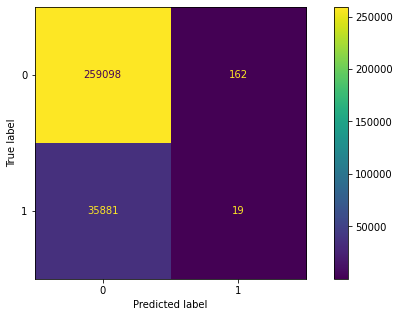

In [205]:
plot_confusion_matrix(lr,x_train,y_train)
plt.show()

In [206]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)
print("classification report train:")
print(classification_report(y_train,y_pred_train))

classification report train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    259260
           1       1.00      1.00      1.00     35900

    accuracy                           1.00    295160
   macro avg       1.00      1.00      1.00    295160
weighted avg       1.00      1.00      1.00    295160



In [207]:
dt.fit(x_train,y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)
print("classification report train:")
print(classification_report(y_test,y_pred_test))

classification report train:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     64819
           1       0.29      0.30      0.29      8971

    accuracy                           0.82     73790
   macro avg       0.59      0.60      0.60     73790
weighted avg       0.83      0.82      0.83     73790



In [208]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train = rf.predict(x_train)
print("classification report train:")
print(classification_report(y_train,y_pred_train))

classification report train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    259260
           1       1.00      1.00      1.00     35900

    accuracy                           1.00    295160
   macro avg       1.00      1.00      1.00    295160
weighted avg       1.00      1.00      1.00    295160



In [209]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_test = rf.predict(x_test)
print("classification report train:")
print(classification_report(y_test,y_pred_test))

classification report train:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     64819
           1       0.35      0.13      0.19      8971

    accuracy                           0.86     73790
   macro avg       0.62      0.55      0.56     73790
weighted avg       0.82      0.86      0.84     73790



Above is the Classification report before balancing the dataset for each model

The model we have built is an underfit model we have to treat the imbalance in the target variable before looking at the results.

In [210]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_resampled, y_resampled = sm.fit_resample(x, y)

In [211]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size =  0.3,random_state = 40)
lr.fit(x_train,y_train)
y_pred_train_lr = lr.predict(x_train)
print("Classification report for training:")
print(classification_report(y_train,y_pred_train_lr))

Classification report for training:
              precision    recall  f1-score   support

           0       0.95      0.60      0.74    226839
           1       0.71      0.97      0.82    226871

    accuracy                           0.78    453710
   macro avg       0.83      0.78      0.78    453710
weighted avg       0.83      0.78      0.78    453710



In [212]:
lr.fit(x_train,y_train)
y_pred_test_lr = lr.predict(x_test)
target_names = ["class_0","class_2"]
print("classification report for testing:")
print(classification_report(y_test,y_pred_test_lr))

classification report for testing:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73     97240
           1       0.71      0.97      0.82     97208

    accuracy                           0.78    194448
   macro avg       0.83      0.78      0.77    194448
weighted avg       0.83      0.78      0.77    194448



Classification report after balancing the dataset


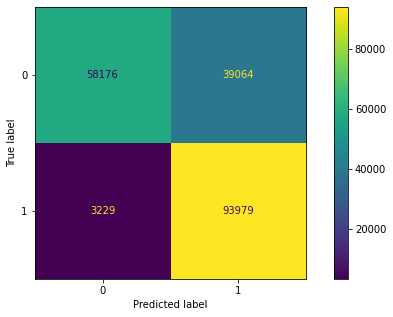

In [213]:
plot_confusion_matrix(lr,x_test,y_test)
plt.show()

The above built model is a baseline model without any hyperparameter tuned

In [214]:
y_resampled.value_counts()

1    324079
0    324079
Name: Response_1, dtype: int64

In [215]:
#x_res1 = x_resampled.iloc[0:100000,:]
#y_res1 = y_resampled[0:100000]
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'penalty' : ['l1', 'l2'],
#     'C' : [100,10,1.0,0.1,0.01]}
# gs = GridSearchCV(estimator = lr,param_grid = param_grid,cv = 10)
# gs.fit(x_train,y_train)
# gs.best_params_

In [216]:
# #x_res1 = x_resampled.iloc[0:100000,:]
# #y_res1 = y_resampled[0:100000]
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'penalty' : ['l1', 'l2'],
#     'C' : [100,10,1.0,0.1,0.01]}
# gs = GridSearchCV(estimator = lr,param_grid = param_grid,cv = 10)
# gs.fit(x_resampled,y_resampled)
# gs.best_params_

# Import Required libraries
# from sklearn.model_selection import validation_curve

# # Setting the range for the parameter (from 1 to 10)
# parameter_range = [100,10,1.0,0.1,0.01]

# # Calculate accuracy on training and test set using the
# # gamma parameter with 5-fold cross validation
# train_score, test_score = validation_curve(LogisticRegression(), x_train, y_train,
# 									param_name = "C",
# 									param_range = parameter_range,
# 										cv = 10, scoring = "accuracy")

# # Calculating mean and standard deviation of training score
# mean_train_score = np.mean(train_score, axis = 1)
# std_train_score = np.std(train_score, axis = 1)

# # Calculating mean and standard deviation of testing score
# mean_test_score = np.mean(test_score, axis = 1)
# std_test_score = np.std(test_score, axis = 1)

# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range, mean_train_score,
# 	label = "Training Score", color = 'b')
# plt.plot(parameter_range, mean_test_score,
# label = "Cross Validation Score", color = 'g')

# # Creating the plot
# plt.title("Validation Curve with Logistic Regression")
# plt.xlabel("C value")
# plt.ylabel("Accuracy")
# plt.tight_layout()
# plt.legend(loc = 'best')
# plt.show()



Logistic regression after hyperparameter tuning

In [217]:
lr = LogisticRegression(penalty = 'l1',C = 0.01,solver = 'liblinear')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test,y_pred))
print("Accuracy:",(accuracy_score(y_test,y_pred))*100)

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     97240
           1       0.71      0.97      0.82     97208

    accuracy                           0.78    194448
   macro avg       0.83      0.78      0.78    194448
weighted avg       0.83      0.78      0.78    194448

Accuracy: 78.36439562248005


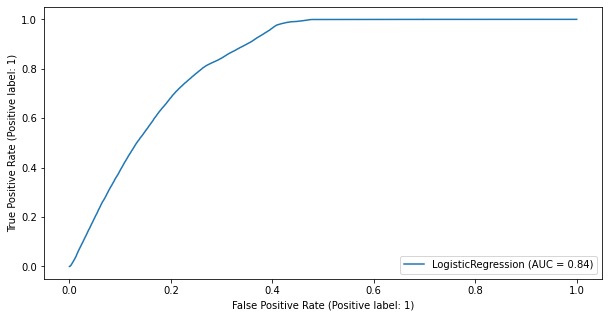

In [218]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,x_test,y_test)
plt.show()

Decision Tree Classifier

In [219]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)
print("classification report train:")
print(classification_report(y_train,y_pred_train))

classification report train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226839
           1       1.00      1.00      1.00    226871

    accuracy                           1.00    453710
   macro avg       1.00      1.00      1.00    453710
weighted avg       1.00      1.00      1.00    453710



In [220]:
print("classification report test:")
print(classification_report(y_test,y_pred_test))

classification report test:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     97240
           1       0.88      0.90      0.89     97208

    accuracy                           0.89    194448
   macro avg       0.89      0.89      0.89    194448
weighted avg       0.89      0.89      0.89    194448



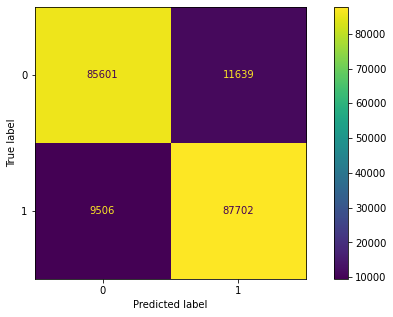

In [221]:
plot_confusion_matrix(dt,x_test,y_test)
plt.show()

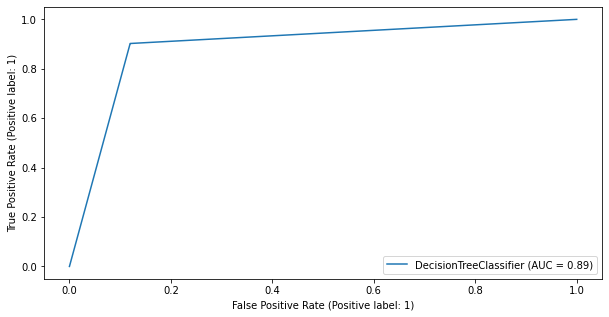

In [222]:
plot_roc_curve(dt,x_test,y_test)
plt.show()

Random Forest Classifier

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train = rf.predict(x_train)
print("classification report train:")
print(classification_report(y_train,y_pred_train))

classification report train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226839
           1       1.00      1.00      1.00    226871

    accuracy                           1.00    453710
   macro avg       1.00      1.00      1.00    453710
weighted avg       1.00      1.00      1.00    453710



In [224]:
y_pred_test = rf.predict(x_test)
print("classification report test:")
print(classification_report(y_test,y_pred_test))

classification report test:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     97240
           1       0.86      0.95      0.90     97208

    accuracy                           0.90    194448
   macro avg       0.90      0.90      0.90    194448
weighted avg       0.90      0.90      0.90    194448



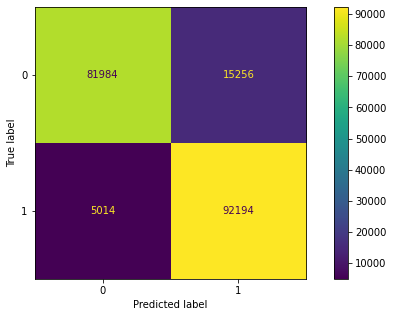

In [225]:
plot_confusion_matrix(rf,x_test,y_test)
plt.show()

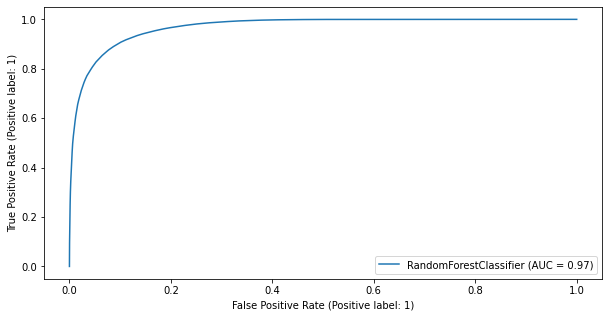

In [226]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.show()

Hyperparameter tuning decision tree


In [227]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {"criterion":["gini","entropy"],
#               "max_depth": np.arange(1,10,1)}
# gs = GridSearchCV(estimator = dt,param_grid = param_grid,cv = 10)
# gs.fit(x_train,y_train)
# gs.best_params_

In [228]:
# parameter_range = np.arange(1,100,10)
# train_score, test_score = validation_curve(DecisionTreeClassifier(), x_train, y_train,
# 									param_name = "max_depth",
# 									param_range = parameter_range,
# 										cv = 10, scoring = "accuracy")

# # Calculating mean and standard deviation of training score
# mean_train_score = np.mean(train_score, axis = 1)
# std_train_score = np.std(train_score, axis = 1)

# # Calculating mean and standard deviation of testing score
# mean_test_score = np.mean(test_score, axis = 1)
# std_test_score = np.std(test_score, axis = 1)

# # Plot mean accuracy scores for training and testing scores
# plt.plot(parameter_range, mean_train_score,
# 	label = "Training Score", color = 'b')
# plt.plot(parameter_range, mean_test_score,
# label = "Cross Validation Score", color = 'g')

# # Creating the plot
# plt.title("Validation Curve with Decision Tree")
# plt.xlabel("Max depth")
# plt.ylabel("Accuracy")
# plt.tight_layout()
# plt.legend(loc = 'best')
# plt.show()

NameError: ignored

Decision Tree model performance after tuning

In [230]:
dt = DecisionTreeClassifier(criterion = "gini",max_depth = 10 )
dt.fit(x_train,y_train)
y_pred_test = dt.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     97240
           1       0.79      0.92      0.85     97208

    accuracy                           0.84    194448
   macro avg       0.85      0.84      0.84    194448
weighted avg       0.85      0.84      0.84    194448



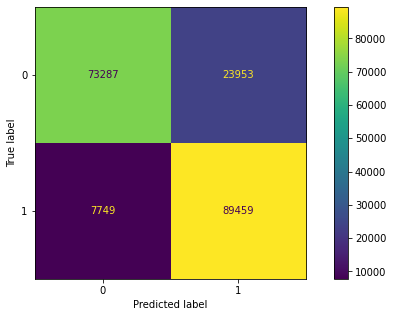

In [231]:
plot_confusion_matrix(dt,x_test,y_test)
plt.show()

HyperParameter tuning Random Forest Classifier

In [232]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix
# x = final_df.drop(columns='Response_1')
# y = final_df["Response_1"]
# n = [50,100,150,200]
# x_train,x_rem,y_train,y_rem = train_test_split(x_resampled,y_resampled,test_size = 0.3,random_state = 40)
# x_val,x_test,y_val,y_test = train_test_split(x_rem,y_rem,test_size = 0.5)
# for i in n:
#   rf = RandomForestClassifier(n_estimators = i)
#   rf.fit(x_train,y_train)
#   y_pred = rf.predict(x_val)
#   print("classification report when n_estimators = ",i)
#   print(classification_report(y_val,y_pred))

After experimenting with various levels of n_estimators we found out that 100 is the optimal one

Random forest classifier after hyperparameter tuning

In [233]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)
y_pred_train = rf.predict(x_train)
print("classification report train:")
print(classification_report(y_train,y_pred_train))

classification report train:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226839
           1       1.00      1.00      1.00    226871

    accuracy                           1.00    453710
   macro avg       1.00      1.00      1.00    453710
weighted avg       1.00      1.00      1.00    453710



In [234]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)
y_pred_test = rf.predict(x_test)
print("classification report train:")
print(classification_report(y_test,y_pred_test))

classification report train:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     97240
           1       0.86      0.95      0.90     97208

    accuracy                           0.90    194448
   macro avg       0.90      0.90      0.90    194448
weighted avg       0.90      0.90      0.90    194448



Gradient Boosting

In [235]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 100)
gb.fit(x_train,y_train)
y_pred_train = gb.predict(x_train)
print("classification report train:")
print(classification_report(y_train,y_pred_train))

classification report train:
              precision    recall  f1-score   support

           0       0.94      0.69      0.80    226839
           1       0.76      0.95      0.84    226871

    accuracy                           0.82    453710
   macro avg       0.85      0.82      0.82    453710
weighted avg       0.85      0.82      0.82    453710



In [236]:
gb = GradientBoostingClassifier(n_estimators = 100)
gb.fit(x_train,y_train)
y_pred_test = gb.predict(x_test)
print("classification report train:")
print(classification_report(y_test,y_pred_test))

classification report train:
              precision    recall  f1-score   support

           0       0.94      0.69      0.79     97240
           1       0.75      0.95      0.84     97208

    accuracy                           0.82    194448
   macro avg       0.85      0.82      0.82    194448
weighted avg       0.85      0.82      0.82    194448



Out of all the models experimented random forest classifier gives the best performance

Ada Boost and XGBClassifier Base Model

              precision    recall  f1-score   support

           0       0.92      0.69      0.79     97240
           1       0.76      0.94      0.84     97208

    accuracy                           0.82    194448
   macro avg       0.84      0.82      0.82    194448
weighted avg       0.84      0.82      0.82    194448



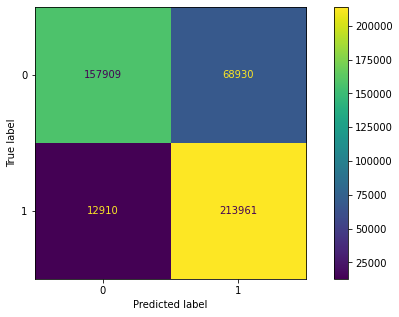

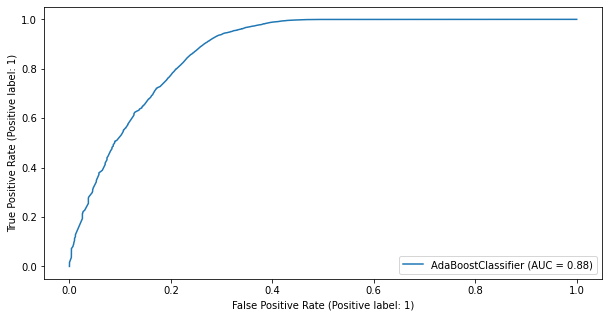

In [237]:
from sklearn.ensemble import AdaBoostClassifier
ada_model= AdaBoostClassifier(n_estimators=100,random_state = 40)
ada_model.fit(x_train,y_train)
y_pred_test = ada_model.predict(x_test)
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(ada_model,x_train,y_train)
plot_roc_curve(ada_model,x_train,y_train)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.64      0.76     97240
           1       0.72      0.96      0.83     97208

    accuracy                           0.80    194448
   macro avg       0.83      0.80      0.79    194448
weighted avg       0.83      0.80      0.79    194448



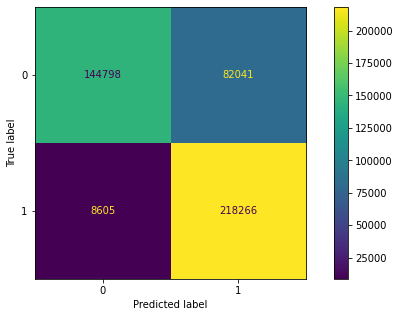

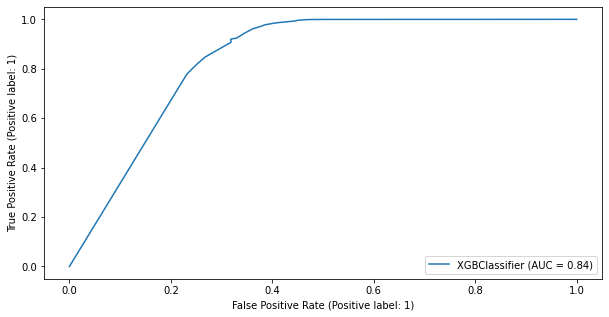

In [238]:
from xgboost import XGBClassifier
xgb_model= XGBClassifier(learning_rate = 0.01, gamma = 2)
xgb_model.fit(x_train,y_train)
y_pred_test = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred_test))
plot_confusion_matrix(xgb_model,x_train,y_train)
plot_roc_curve(xgb_model,x_train,y_train)
plt.show()

Hyper Parameter Tuning for Ada Boosting and XGBClassifier

In [239]:
# tuned_paramaters = [{'n_estimators': [50, 100, 150, 200],
#                      'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]

In [240]:
# ada_grid = GridSearchCV(estimator = ada_model, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5,
#                          n_jobs=-1)
# ada_grid.fit(x_train, y_train)
# # get the best parameters
# print('Best parameters for AdaBoost Classifier: ', ada_grid.best_params_, '\n')

In [241]:
# tuned_paramaters = [{'n_estimators': [50, 100, 150, 200],
#                      'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015], 
#                      }]

In [242]:
# gb_grid = GridSearchCV(estimator = xgb_model, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5, 
#                          n_jobs=-1)

# # fit the model on X_train and y_train using fit()
# gb_grid.fit(x_train, y_train)

# # get the best parameters
# print('Best parameters for Gradient Boositng Classifier: ', gb_grid.best_params_, '\n')

In [243]:
# Optuna and Early Stop
# from sklearn.model_selection import cross_val_score
# def objective(trial):
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
#     max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
#     n_estimators = trial.suggest_int("n_estimators", 100,500)

#     rf = RandomForestClassifier(criterion =criterion,
#             max_depth=max_depth, 
#             n_estimators=n_estimators
#         )

#     score = cross_val_score(rf, x, y, n_jobs=-1, cv=5)
#     accuracy = score.mean()
#     return accuracy


# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=15)

In [244]:
# trial = study.best_trial
# print('Accuracy: {}'.format(trial.value))
# print("Best hyperparameters: {}".format(trial.params))

In [245]:
# print("Best params: ", study.best_params)
# print("Best value: ", study.best_value)
# print("Best Trial: ", study.best_trial)
# print("Trials: ", study.trials)

PLOTTING THE STUDY CREATED BY OPTUNA

In [246]:
#optuna.visualization.plot_optimization_history(study)

In [247]:
#optuna.visualization.plot_slice(study)

In [248]:
rf = RandomForestClassifier(criterion='entropy', max_depth= 15,n_estimators= 394)
rf.fit(x_train,y_train)
y_pred_train = rf.predict(x_train)
print("classification report train:")
print(classification_report(y_train,y_pred_train))

classification report train:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81    226839
           1       0.76      0.97      0.86    226871

    accuracy                           0.84    453710
   macro avg       0.86      0.84      0.83    453710
weighted avg       0.86      0.84      0.83    453710



In [249]:
y_pred_test = rf.predict(x_test)
print("classification report train:")
print(classification_report(y_test,y_pred_test))

classification report train:
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     97240
           1       0.76      0.97      0.85     97208

    accuracy                           0.83    194448
   macro avg       0.85      0.83      0.82    194448
weighted avg       0.85      0.83      0.82    194448



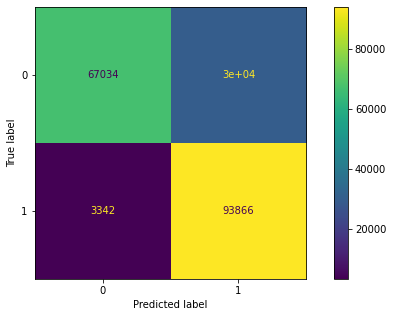

In [253]:
plot_confusion_matrix(rf,x_test,y_test)
plt.show()

In [251]:
# from sklearn.model_selection import cross_val_score
# def objective(trial):
#     criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])
#     max_depth = trial.suggest_int("max_depth", 2, 32, log=True)
#     #n_estimators = trial.suggest_int("n_estimators", 100,500)

#     rf = DecisionTreeClassifier(criterion =criterion,
#             max_depth=max_depth)

#     score = cross_val_score(rf, x, y, n_jobs=-1, cv=5)
#     accuracy = score.mean()
#     return accuracy


# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=15)

In [254]:
dt = DecisionTreeClassifier(criterion = "gini",max_depth = 10 )
dt.fit(x_train,y_train)
y_pred_test = dt.predict(x_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82     97240
           1       0.79      0.92      0.85     97208

    accuracy                           0.84    194448
   macro avg       0.85      0.84      0.84    194448
weighted avg       0.85      0.84      0.84    194448



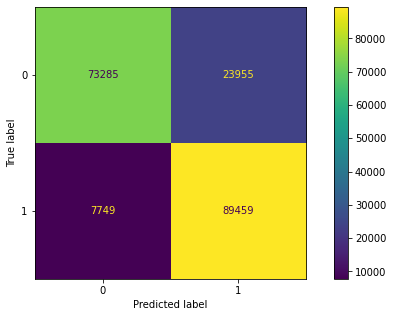

In [255]:
plot_confusion_matrix(dt,x_test,y_test)
plt.show()